# Preamble

In [1]:
suppressMessages(source("../src/R/load_data.R"))

Warning message:
“Missing column names filled in: 'X1' [1]”


[1] 1398   30
Dataset is loaded to naming, wdata, nwdata

In [2]:
require(mgcv)
require(partykit)
require(itsadug)
require(languageR)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: itsadug

Loading required package: plotfunctions

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Loading required package: languageR



In [3]:
## helper function to plot interaction
popt = function(w, h, r=200) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r) }
plot_int = function(model, idx, x, y, ...){
    popt(12, 6)
    par(mfrow=c(1,2))
    plot(model, select=idx, lwd=2, ...)
    vis.gam(model, view=c(x, y), plot.type="contour", color="topo", too.far=0.1, ...)
}

# Naming - Chinese character

In [4]:
dim(naming)
names(naming)

[1] 1053   59

[1] "Character"              "zhuyin"                 "Phonetic Component"    
 [4] "Semantic Component"     "Frequency"              "Consistency (type)"    
 [7] "Consistency (token)"    "Regularity"             "Homophone Density"     
[10] "Phonetic Combinability" "Semantic Combinability" "Stroke"                
[13] "Familiarity"            "sar"                    "NC1"                   
[16] "NC2"                    "Naming Acc"             "RT"                    
[19] "word"                   "n_sense"                "log_n_sense"           
[22] "n_tagged"               "sfreq_sum"              "sfreq_max"             
[25] "sfreq_std"              "sfreq_ent"              "sfreq_ent_norm"        
[28] "vol_raw"                "vol_cen"                "vol_cennorm"           
[31] "Stop"                   "Affricate"              "Fricative"             
[34] "Nasal"                  "Liquid"                 "Aspirated"             
[37] "Voiced"                 "Bilabial"               "LabioDental"           
[40] "Alveolar"               "PalatalAlveolar"        "AlveloPalatal"         
[43] "Velar"                  "Vowel"                  "log_freq"              
[46] "RTinv"                  "sf_rmax"                "mw_nV"                 
[49] "mw_nE"                  "mw_weightD"             "mw_D"                  
[52] "rEV"                    "CD"                     "log_CD"                
[55] "SemD"                   "SemVar"                 "SemVarRes"             
[58] "Witin-group distance"   "Between-group distance"

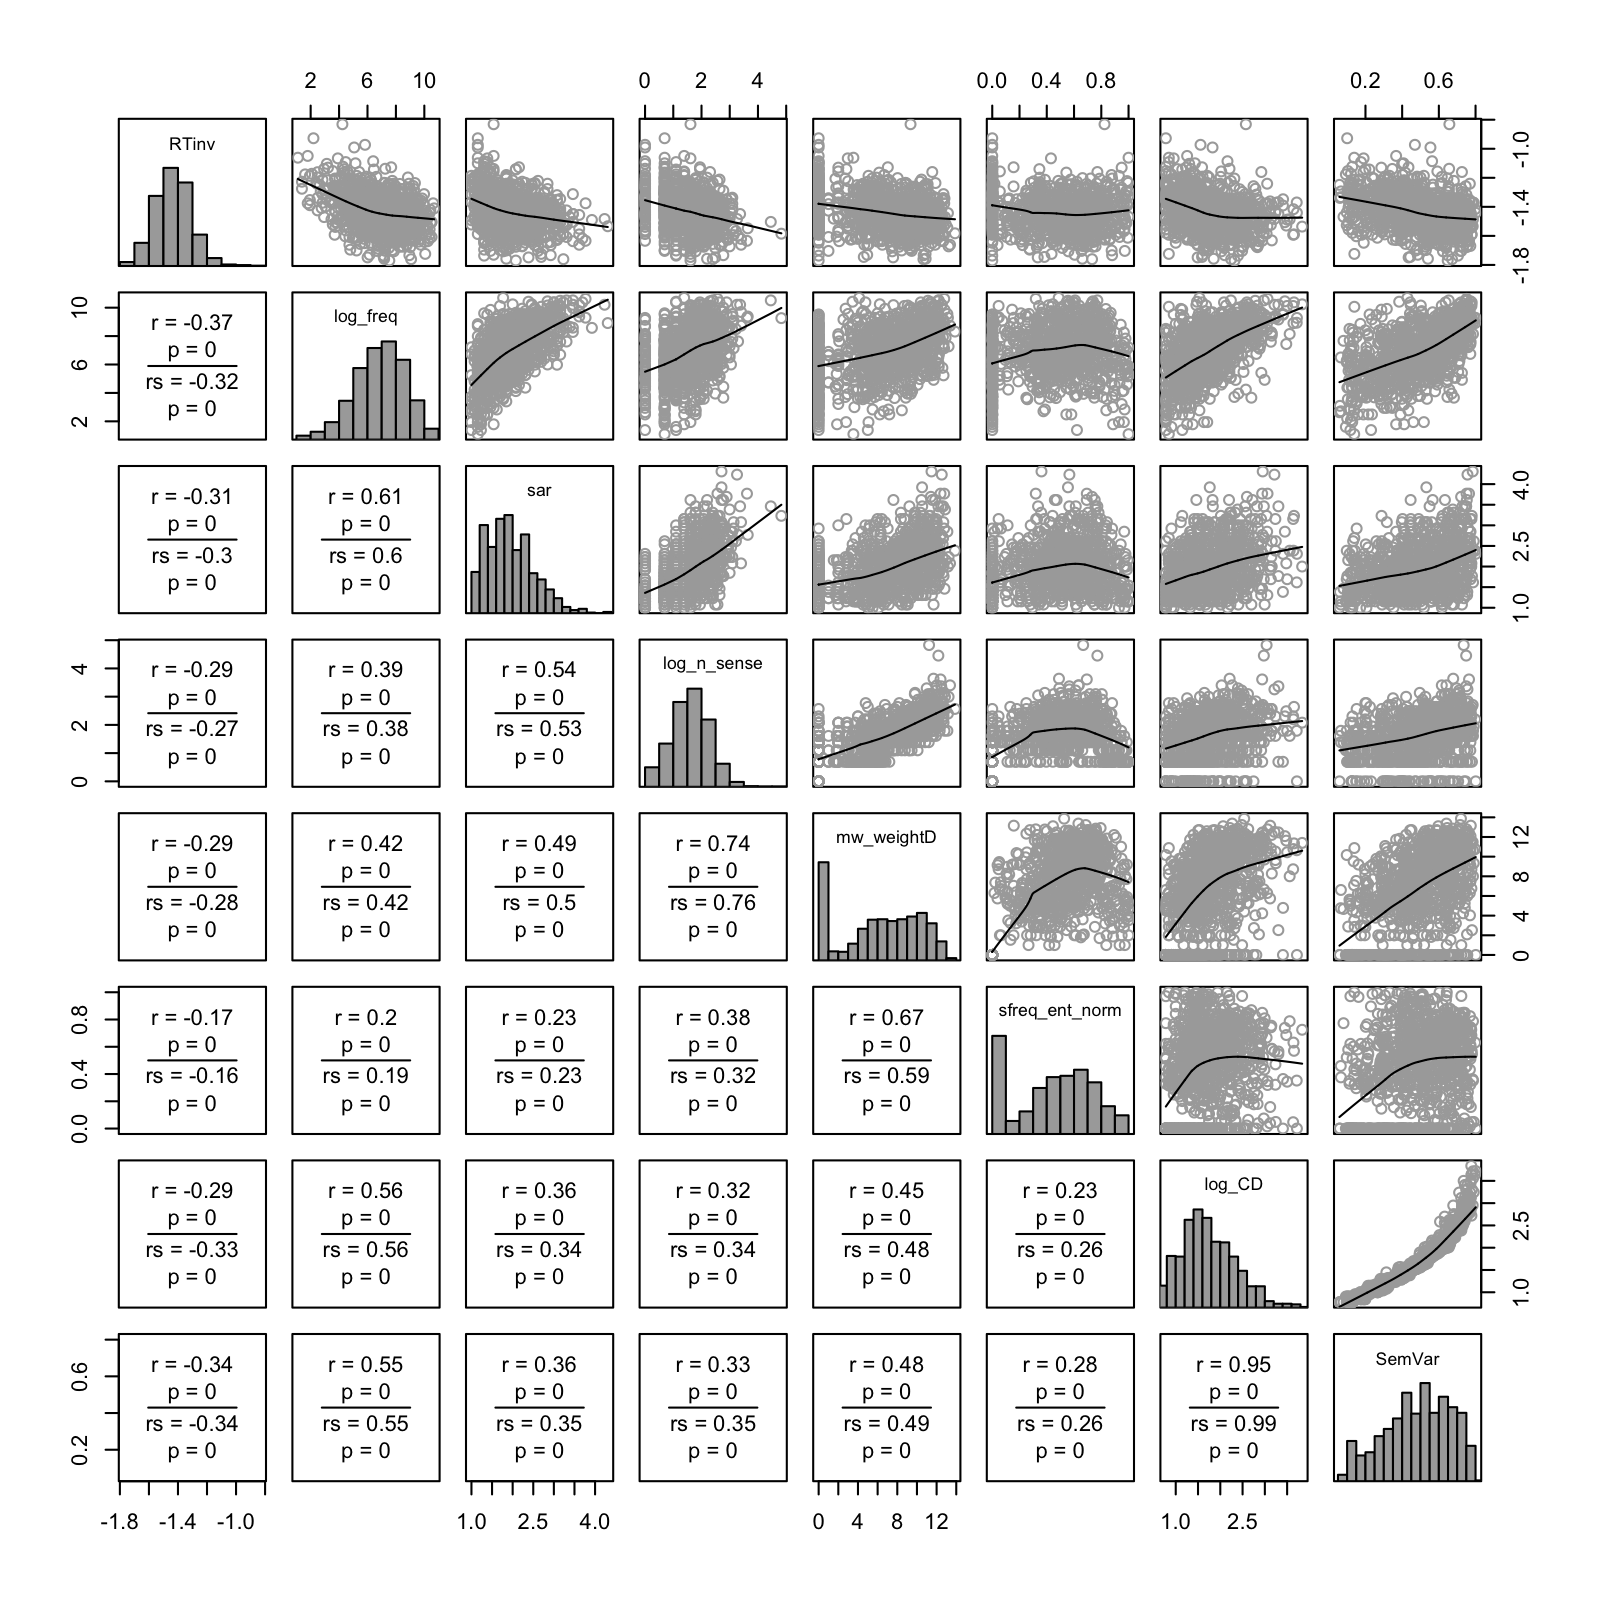

In [5]:
popt(8, 8)
pairscor.fnc(naming[,strsplit("RTinv,log_freq,sar,log_n_sense,mw_weightD,sfreq_ent_norm,log_CD,SemVar", ",")[[1]]])

## GAM - Semantic Ambiguity

In [6]:
sar.0 = bam(sar ~ s(log_n_sense) + s(mw_weightD), data=naming)

In [7]:
summary(sar.0)


Family: gaussian 
Link function: identity 

Formula:
sar ~ s(log_n_sense) + s(mw_weightD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01442   135.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                 edf Ref.df     F  p-value    
s(log_n_sense) 2.401  3.094 33.44  < 2e-16 ***
s(mw_weightD)  2.359  2.901 10.99 1.01e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.314   Deviance explained = 31.7%
fREML = 704.55  Scale est. = 0.21886   n = 1053

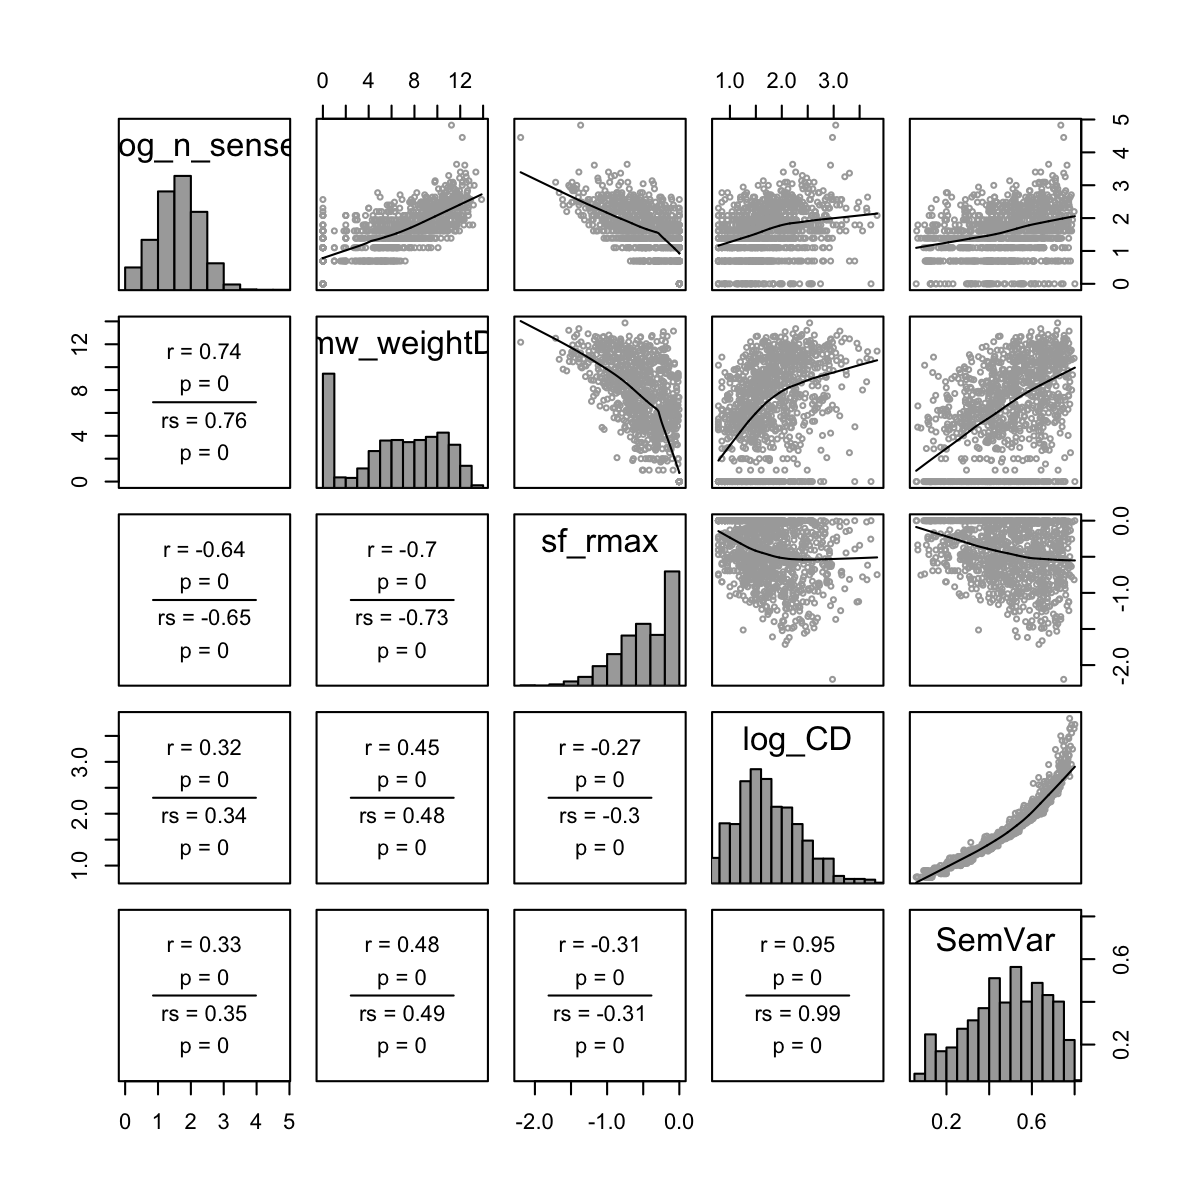

In [30]:
popt(6,6,200)
pairscor.fnc(naming[,strsplit("log_n_sense,mw_weightD,sf_rmax,log_CD,SemVar",",")[[1]]], cex.points=0.5)

In [22]:
sar.1.1 = bam(sar ~ s(log_n_sense) + s(log_CD), data=naming, method="ML")

In [23]:
summary(sar.1.1)


Family: gaussian 
Link function: identity 

Formula:
sar ~ s(log_n_sense) + s(log_CD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01428   136.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df      F p-value    
s(log_n_sense)   1      1 311.88  <2e-16 ***
s(log_CD)        1      1  60.37  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.327   Deviance explained = 32.9%
-ML = 682.35  Scale est. = 0.21459   n = 1053

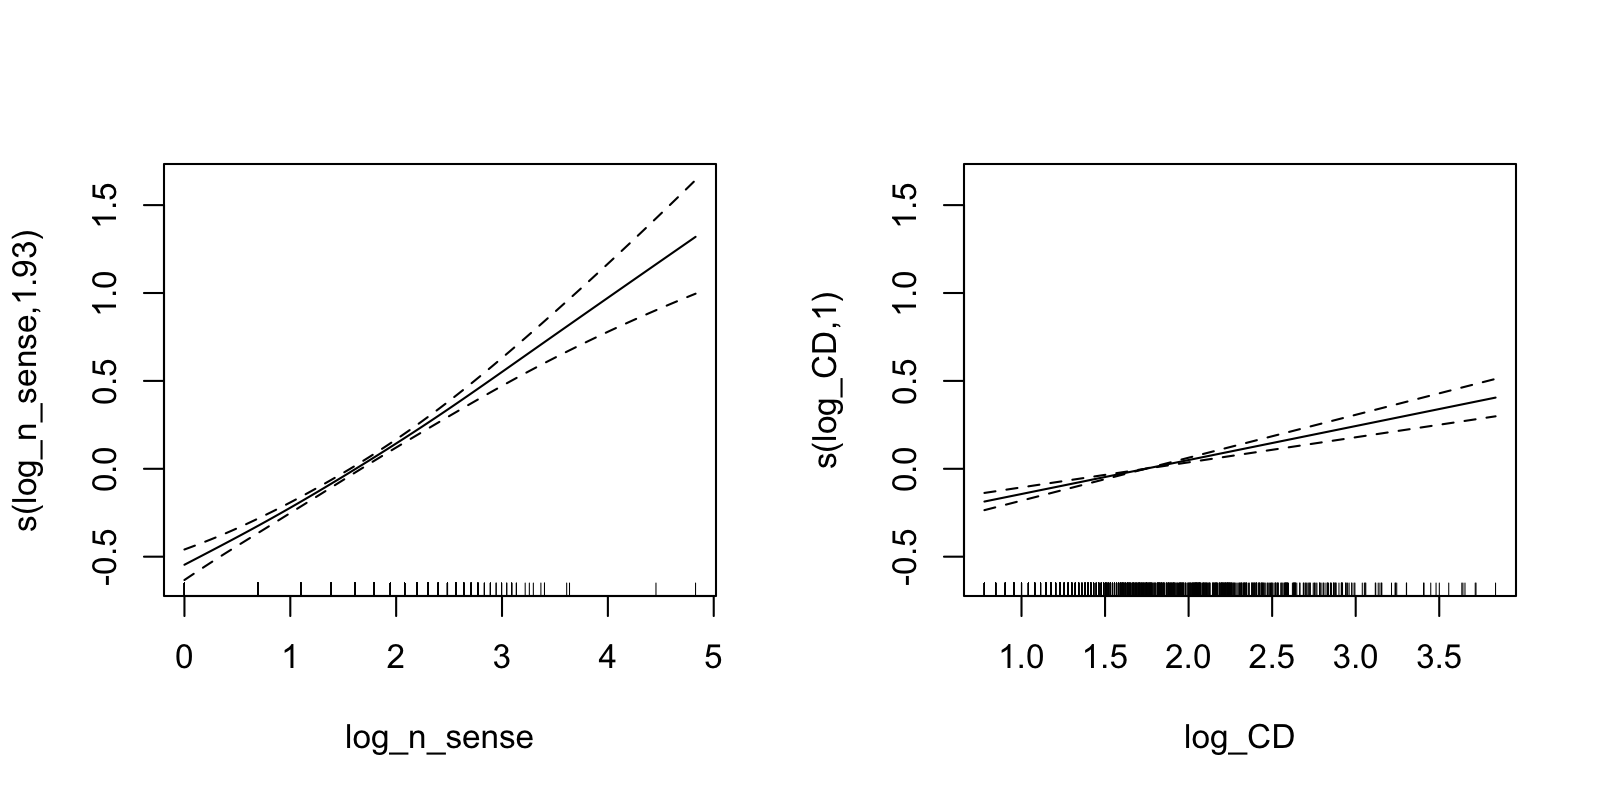

In [15]:
popt(8,4)
plot(sar.1.1, pages=1)

In [24]:
sar.1.2 = bam(sar ~ s(log_n_sense) + s(sf_rmax) + s(log_CD), data=naming, method="ML")

In [25]:
summary(sar.1.2)


Family: gaussian 
Link function: identity 

Formula:
sar ~ s(log_n_sense) + s(sf_rmax) + s(log_CD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01428   136.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df      F p-value    
s(log_n_sense)   1      1 184.20  <2e-16 ***
s(sf_rmax)       1      1   0.46   0.498    
s(log_CD)        1      1  58.82  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.327   Deviance explained = 32.9%
-ML = 682.12  Scale est. = 0.2147    n = 1053

In [26]:
sar.1.3 = bam(sar ~ s(log_n_sense) + s(mw_weightD) + s(log_CD), data=naming, method="ML")
summary(sar.1.3)


Family: gaussian 
Link function: identity 

Formula:
sar ~ s(log_n_sense) + s(mw_weightD) + s(log_CD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01421   137.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                 edf Ref.df       F p-value    
s(log_n_sense) 1.000  1.000 108.784 < 2e-16 ***
s(mw_weightD)  1.788  2.201   4.421 0.00843 ** 
s(log_CD)      1.000  1.000  38.616 < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.334   Deviance explained = 33.6%
-ML = 678.54  Scale est. = 0.2125    n = 1053

In [28]:
c(AIC(sar.1.1), AIC(sar.1.2), AIC(sar.1.3))

[1] 1372.700 1374.238 1365.009

In [236]:
sar.2 = bam(sar ~ te(log_n_sense,mw_weightD) + s(log_CD,SemVar), data=naming)

In [237]:
summary(sar.2)


Family: gaussian 
Link function: identity 

Formula:
sar ~ te(log_n_sense, mw_weightD) + s(log_CD, SemVar)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01419   137.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                             edf Ref.df      F  p-value    
te(log_n_sense,mw_weightD) 3.623  4.046 79.480  < 2e-16 ***
s(log_CD,SemVar)           4.235  5.616  6.975 1.52e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.336   Deviance explained = 34.1%
fREML = 686.47  Scale est. = 0.21188   n = 1053

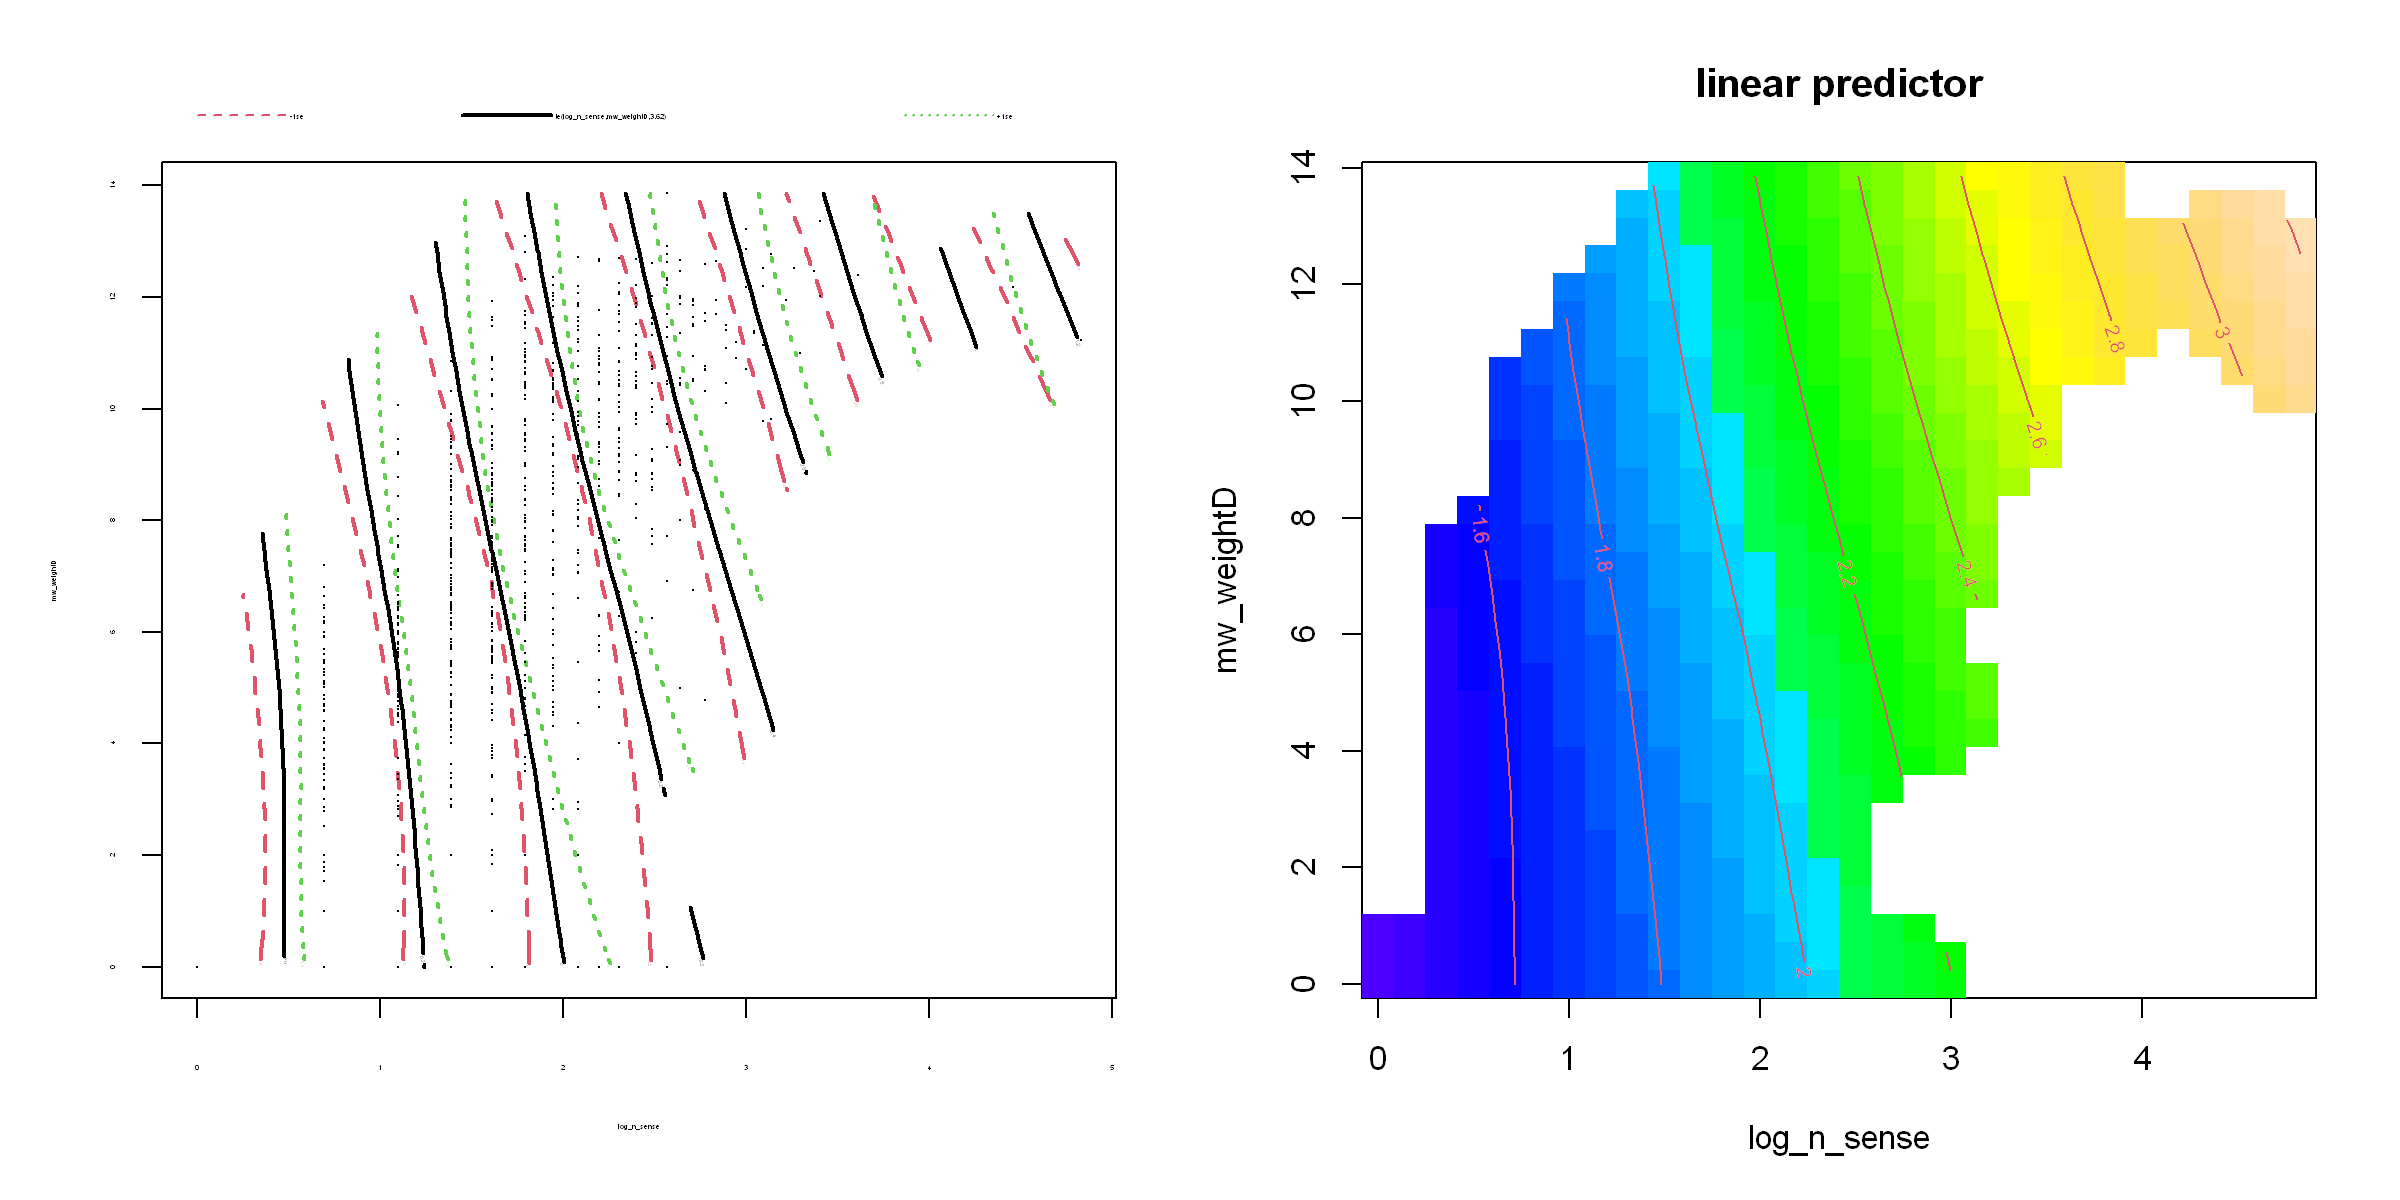

In [238]:
plot_int(sar.2, 1, "log_n_sense", "mw_weightD")

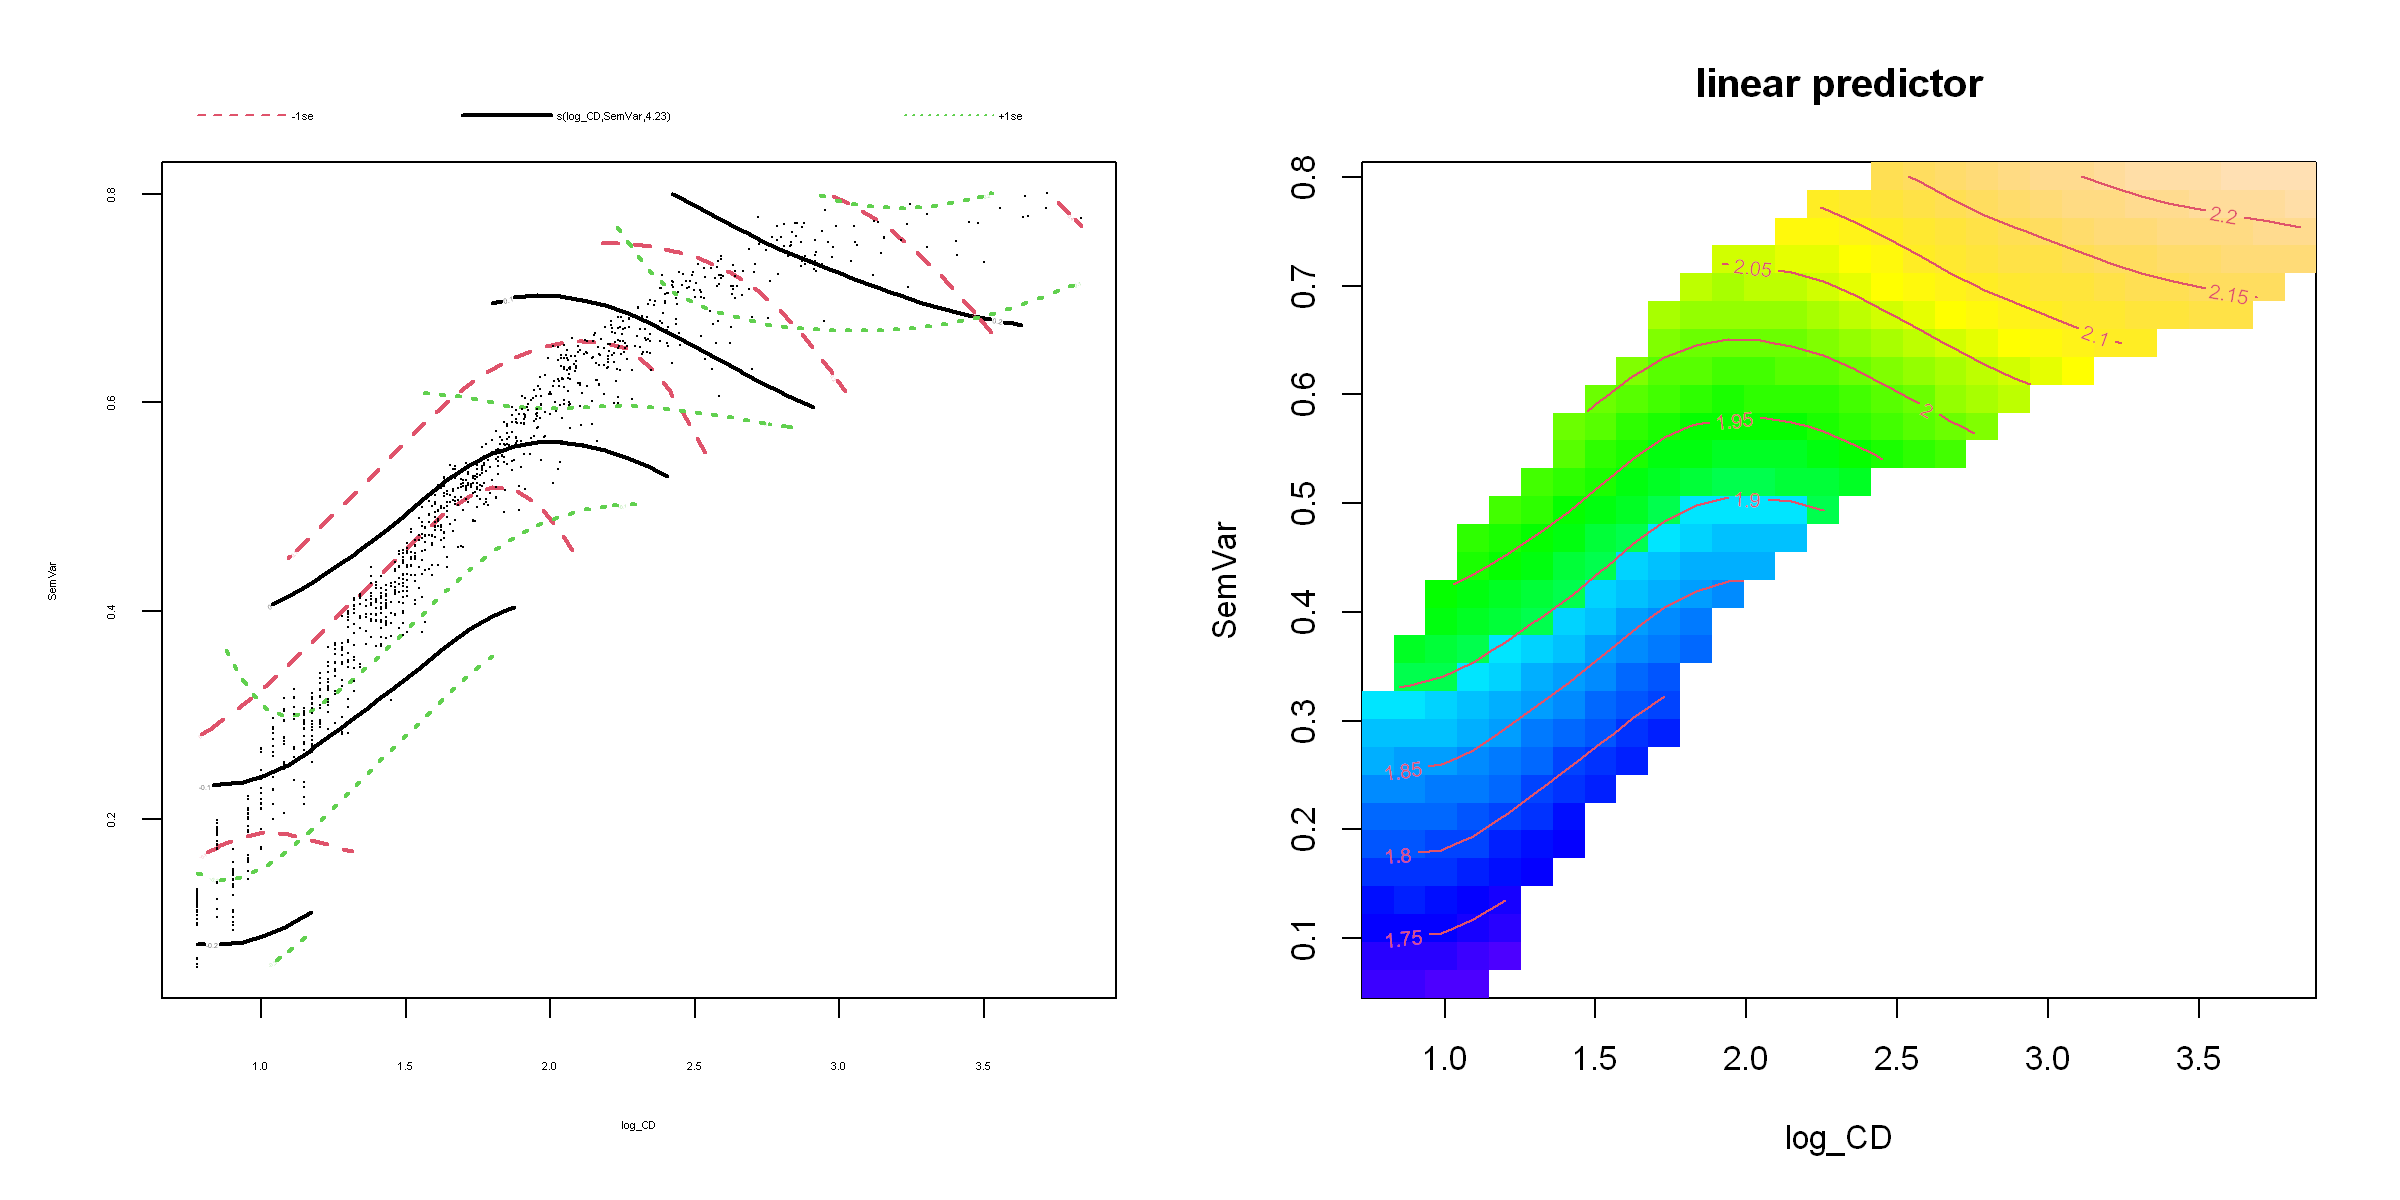

In [239]:
plot_int(sar.2, 2, "log_CD", "SemVar")

## GAM - Naming

In [93]:
require(mgcv)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.



In [95]:
gam.0 = bam(RTinv~s(log_freq)+te(log_n_sense, mw_weightD), data=naming)

In [96]:
summary(gam.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + te(log_n_sense, mw_weightD)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.432685   0.003447  -415.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                             edf Ref.df      F p-value    
s(log_freq)                3.360  4.227 27.437  <2e-16 ***
te(log_n_sense,mw_weightD) 4.336  4.982  7.991  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.187   Deviance explained = 19.3%
fREML = -796.21  Scale est. = 0.012514  n = 1053

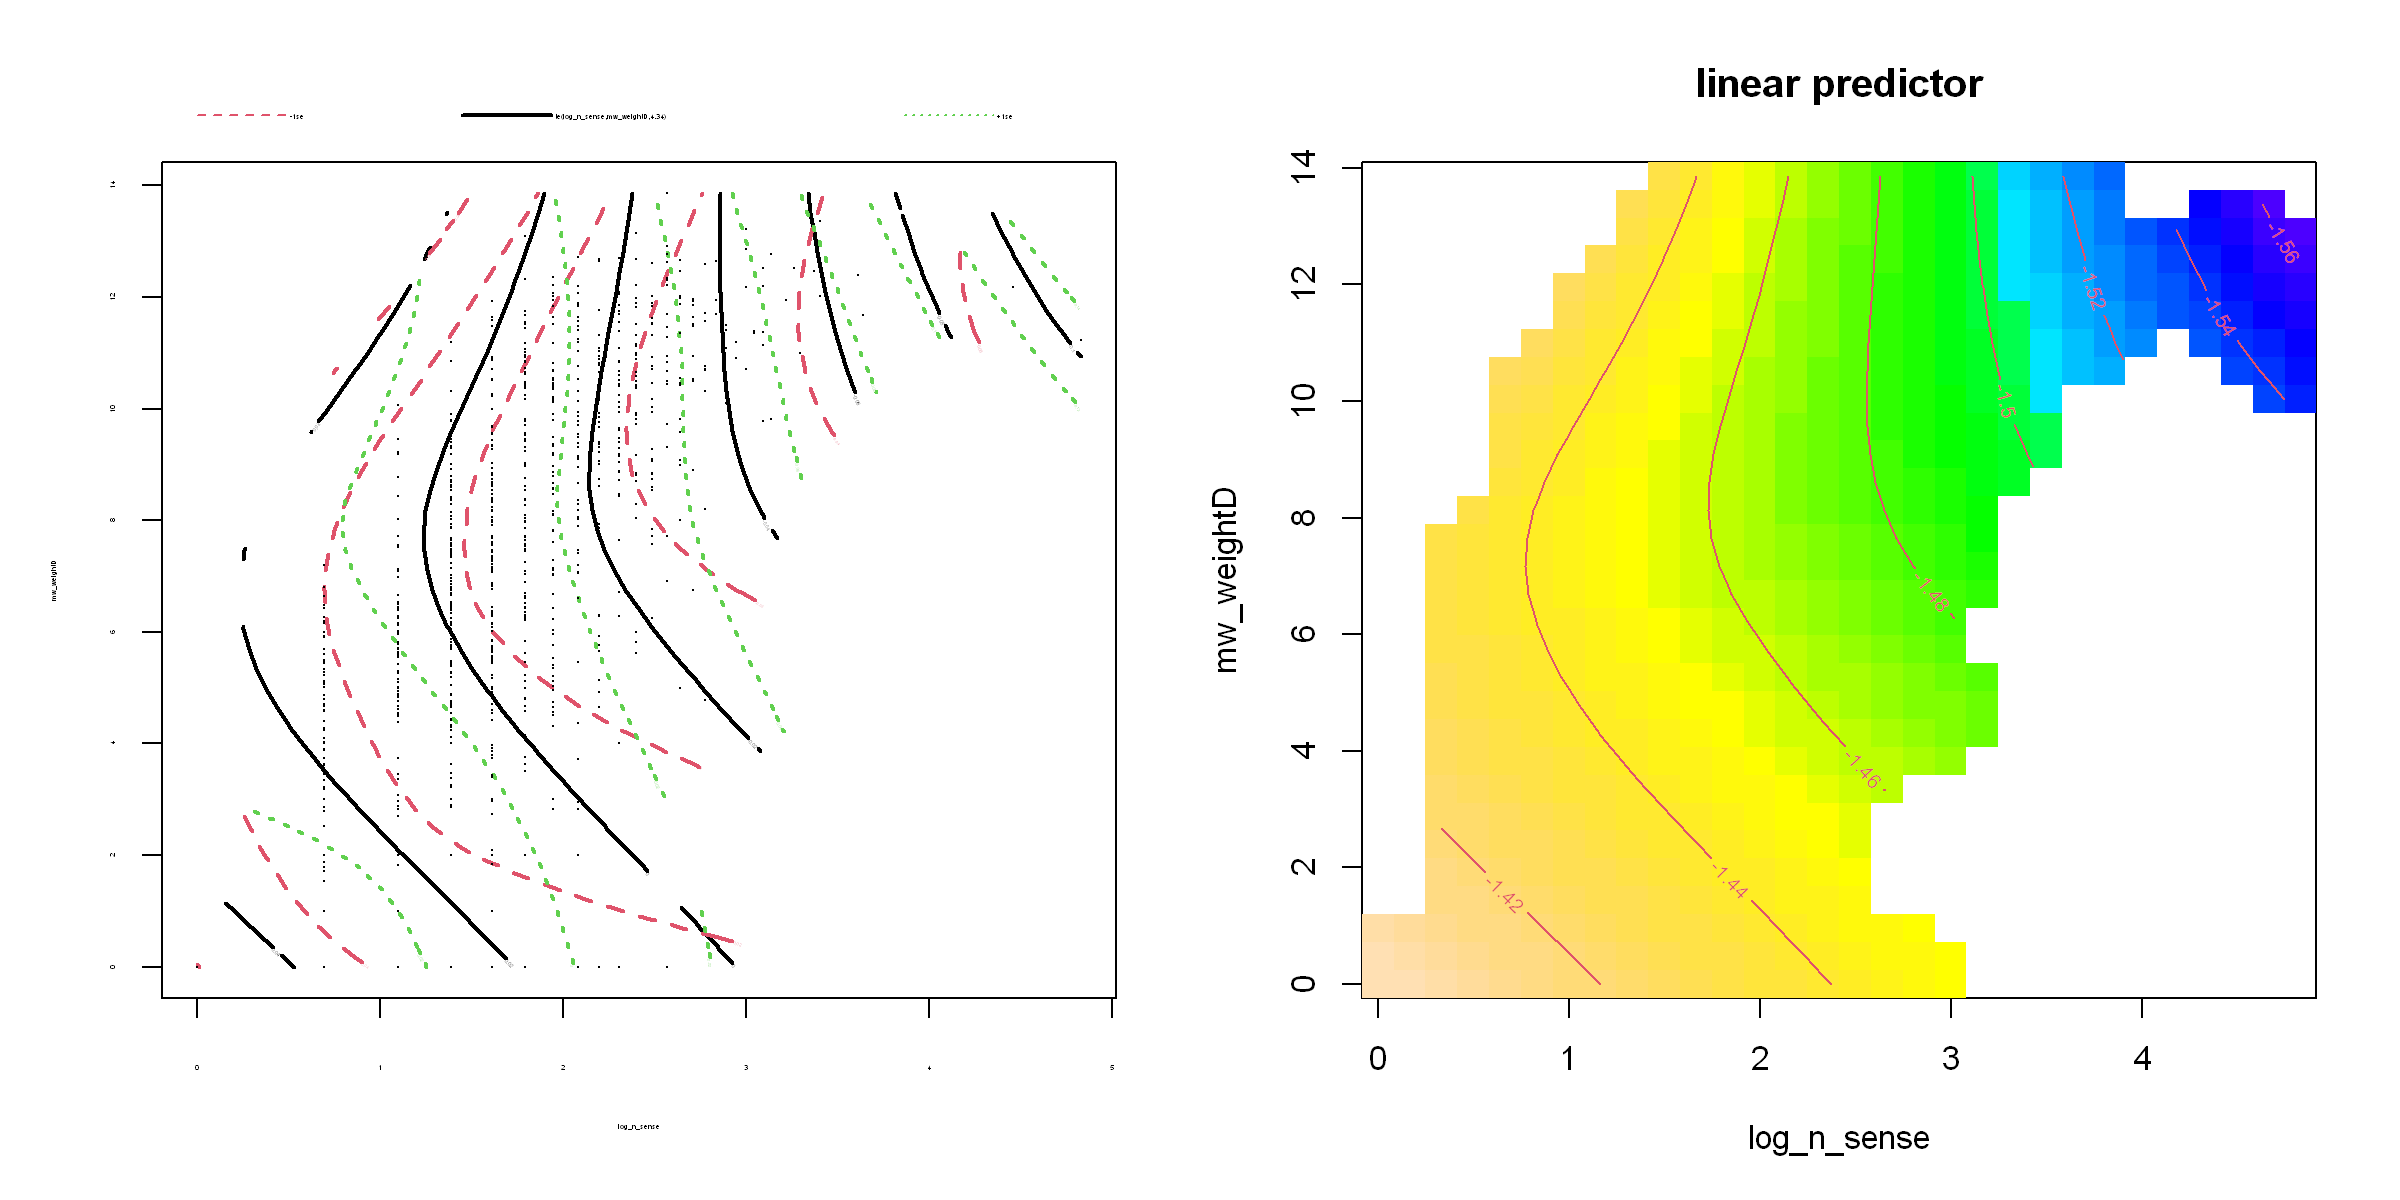

In [98]:
plot_int(gam.0, 2, "log_n_sense", "mw_weightD")

In [115]:
gam.1 = bam(RTinv ~ s(log_freq) + s(log_n_sense), data=naming)

In [116]:
gam.2 = bam(RTinv ~ s(log_freq) + s(mw_weightD), data=naming)

In [117]:
summary(gam.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.432685   0.003455  -414.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F p-value    
s(log_freq)    3.394  4.267 29.86  <2e-16 ***
s(log_n_sense) 1.000  1.000 33.47  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.183   Deviance explained = 18.7%
fREML = -794.95  Scale est. = 0.012573  n = 1053

In [119]:
summary(gam.2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(mw_weightD)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.432685   0.003463  -413.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                edf Ref.df     F p-value    
s(log_freq)   3.396  4.269 28.75 < 2e-16 ***
s(mw_weightD) 1.161  1.302 23.47 1.4e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =   0.18   Deviance explained = 18.3%
fREML = -792.71  Scale est. = 0.012625  n = 1053

In [128]:
names(naming)

[1] "Character"              "zhuyin"                 "Phonetic Component"    
 [4] "Semantic Component"     "Frequency"              "Consistency (type)"    
 [7] "Consistency (token)"    "Regularity"             "Homophone Density"     
[10] "Phonetic Combinability" "Semantic Combinability" "Stroke"                
[13] "Familiarity"            "sar"                    "NC1"                   
[16] "NC2"                    "Naming Acc"             "RT"                    
[19] "word"                   "n_sense"                "log_n_sense"           
[22] "n_tagged"               "sfreq_sum"              "sfreq_max"             
[25] "sfreq_std"              "sfreq_ent"              "sfreq_ent_norm"        
[28] "vol_raw"                "vol_cen"                "vol_cennorm"           
[31] "Stop"                   "Affricate"              "Fricative"             
[34] "Nasal"                  "Liquid"                 "Aspirated"             
[37] "Voiced"                 "Bilabial"               "LabioDental"           
[40] "Alveolar"               "PalatalAlveolar"        "AlveloPalatal"         
[43] "Velar"                  "log_freq"               "RTinv"                 
[46] "sf_rmax"                "mw_nV"                  "mw_nE"                 
[49] "mw_weightD"             "mw_D"                   "rEV"                   
[52] "CD"                     "log_CD"                 "SemD"                  
[55] "SemVar"                 "SemVarRes"              "Witin-group distance"  
[58] "Between-group distance"

In [150]:
gam.p1 = bam(RTinv ~ Stop+Affricate+Fricative+
                    Nasal+Liquid+Aspirated+
                    Voiced+Bilabial+LabioDental+
                    Alveolar+PalatalAlveolar+AlveloPalatal+
                    Velar+
                    s(log_freq) + s(log_n_sense), data=naming)

In [151]:
c(AIC(gam.1), AIC(gam.2),AIC(gam.p1))

[1] -1612.216 -1605.972 -1820.979

In [152]:
summary(gam.p1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ Stop + Affricate + Fricative + Nasal + Liquid + Aspirated + 
    Voiced + Bilabial + LabioDental + Alveolar + PalatalAlveolar + 
    AlveloPalatal + Velar + s(log_freq) + s(log_n_sense)

Parametric coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.364681   0.028091 -48.581  < 2e-16 ***
Stop            -0.028271   0.013878  -2.037 0.041893 *  
Affricate       -0.037126   0.010441  -3.556 0.000394 ***
Fricative        0.000000   0.000000     NaN      NaN    
Nasal           -0.010125   0.032028  -0.316 0.751963    
Liquid          -0.012647   0.030838  -0.410 0.681799    
Aspirated       -0.058133   0.012060  -4.820 1.65e-06 ***
Voiced          -0.097096   0.026761  -3.628 0.000299 ***
Bilabial        -0.049192   0.031112  -1.581 0.114157    
LabioDental     -0.037190   0.031776  -1.170 0.242114    
Alveolar        -0.025204   0.029173  -0.864 0.387814    
PalatalAlveolar  0.006919   0.

In [248]:
gam.p2 = bam(RTinv ~ Stop+Affricate+Fricative+
                    Nasal+Liquid+Aspirated+
                    Voiced+Bilabial+LabioDental+
                    Alveolar+PalatalAlveolar+AlveloPalatal+
                    Velar+
                    s(log_freq) + s(mw_weightD), data=naming)

In [249]:
summary(gam.p2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ Stop + Affricate + Fricative + Nasal + Liquid + Aspirated + 
    Voiced + Bilabial + LabioDental + Alveolar + PalatalAlveolar + 
    AlveloPalatal + Velar + s(log_freq) + s(mw_weightD)

Parametric coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.36072    0.02804 -48.531  < 2e-16 ***
Stop            -0.06941    0.03555  -1.952 0.051180 .  
Affricate       -0.07931    0.03561  -2.227 0.026142 *  
Fricative       -0.04197    0.03172  -1.323 0.186126    
Nasal           -0.04907    0.02607  -1.883 0.060043 .  
Liquid          -0.04805    0.02478  -1.939 0.052776 .  
Aspirated       -0.05893    0.01204  -4.895 1.14e-06 ***
Voiced          -0.10151    0.02672  -3.799 0.000154 ***
Bilabial        -0.01125    0.02167  -0.519 0.603647    
LabioDental      0.00000    0.00000     NaN      NaN    
Alveolar         0.01116    0.01916   0.583 0.560167    
PalatalAlveolar  0.04724    0.01832   2.578

In [251]:
c(AIC(gam.p1), AIC(gam.p2))

[1] -1820.979 -1822.695

# LDT - Bisyllabic words

## Variable Correlations

In [ ]:
require(ggplot)
require(GGally)
require(dplyr)

In [5]:
names(wdata)

[1] "Word_Trad"           "C2"                  "C1"                 
 [4] "Word_Sim"            "Ntrials"             "Acc"                
 [7] "RT"                  "RT-SE"               "RT-SD"              
[10] "zRT"                 "Stroke-1"            "Stroke-2"           
[13] "C&B-Subtitle-raw-C1" "C&B-Subtitle-raw-C2" "C&B-Subtitle-CD-C1" 
[16] "C&B-Subtitle-CD-C2"  "SS&M-C1"             "SS&M-C2"            
[19] "Da-Modern-C1"        "Da-Modern-C2"        "Google-freq-C1"     
[22] "Google-freq-C2"      "C&B-Subtitle-raw-W"  "C&B-Subtitle-CD-W"  
[25] "SS&M-W"              "Da-News-W"           "Da-Fiction-W"       
[28] "Google-freq-W"       "ST-C1"               "ST-C2"              
[31] "n_sense_W"           "log_n_sense_W"       "n_tagged_W"         
[34] "sfreq_sum_W"         "sfreq_max_W"         "sfreq_std_W"        
[37] "sfreq_ent_W"         "sfreq_ent_norm_W"    "vol_raw_W"          
[40] "vol_cen_W"           "vol_cennorm_W"       "n_sense_C1"         
[43] "log_n_sense_C1"      "n_tagged_C1"         "sfreq_sum_C1"       
[46] "sfreq_max_C1"        "sfreq_std_C1"        "sfreq_ent_C1"       
[49] "sfreq_ent_norm_C1"   "vol_raw_C1"          "vol_cen_C1"         
[52] "vol_cennorm_C1"      "n_sense_C2"          "log_n_sense_C2"     
[55] "n_tagged_C2"         "sfreq_sum_C2"        "sfreq_max_C2"       
[58] "sfreq_std_C2"        "sfreq_ent_C2"        "sfreq_ent_norm_C2"  
[61] "vol_raw_C2"          "vol_cen_C2"          "vol_cennorm_C2"     
[64] "log_freq_W"          "log_freq_C1"         "log_freq_C2"        
[67] "RTinv"               "sf_rmax_W"           "sf_rmax_C1"         
[70] "sf_rmax_C2"          "mw_nV_C1"            "mw_nE_C1"           
[73] "mw_weightD_C1"       "mw_D_C1"             "mw_nV_C2"           
[76] "mw_nE_C2"            "mw_weightD_C2"       "mw_D_C2"            
[79] "word_sense"          "wd_weightD"          "c1_sense"           
[82] "c2_sense"            "c1_emb_sense"        "c2_emb_sense"       
[85] "intersect"           "c1_pathlen"          "c2_pathlen"         
[88] "c1w_cossim"          "c2w_cossim"          "c1w_embsim"         
[91] "c2w_embsim"          "c1w_wordvec"         "c2w_wordvec"        
[94] "rVE_C1"              "rVE_C2"

In [6]:
wdata_vars = strsplit(paste0(
"RTinv,log_freq_W,log_freq_C1,log_freq_C2,log_n_sense_W,wd_weightD,",
"mw_weightD_C1,mw_weightD_C2,log_n_sense_C1,log_n_sense_C2,",
"c1w_embsim,c2w_embsim,c1w_wordvec,c2w_wordvec"), ",")[[1]]

In [7]:
wdata_vars

[1] "RTinv"          "log_freq_W"     "log_freq_C1"    "log_freq_C2"   
 [5] "log_n_sense_W"  "wd_weightD"     "mw_weightD_C1"  "mw_weightD_C2" 
 [9] "log_n_sense_C1" "log_n_sense_C2" "c1w_embsim"     "c2w_embsim"    
[13] "c1w_wordvec"    "c2w_wordvec"

In [8]:
# drop entries where freq has NA
dim(wdata)
wdata = wdata[apply(wdata[,c("log_freq_W", "log_freq_C1", "log_freq_C2")], 1, function(x){!any(is.na(x))}),]
cat("after removing freq with NAs")
dim(wdata)

[1] 3056   95

after removing freq with NAs

[1] 2905   95

### Variable naming notes
* *_cossim: the cosine simliarity between the whole words and the nearest sense of constituent determined by the **sense graph**
* *_embsim: the cosine simliarity between the whole words and the nearest sense of constituent determined by the **sense embeddings**

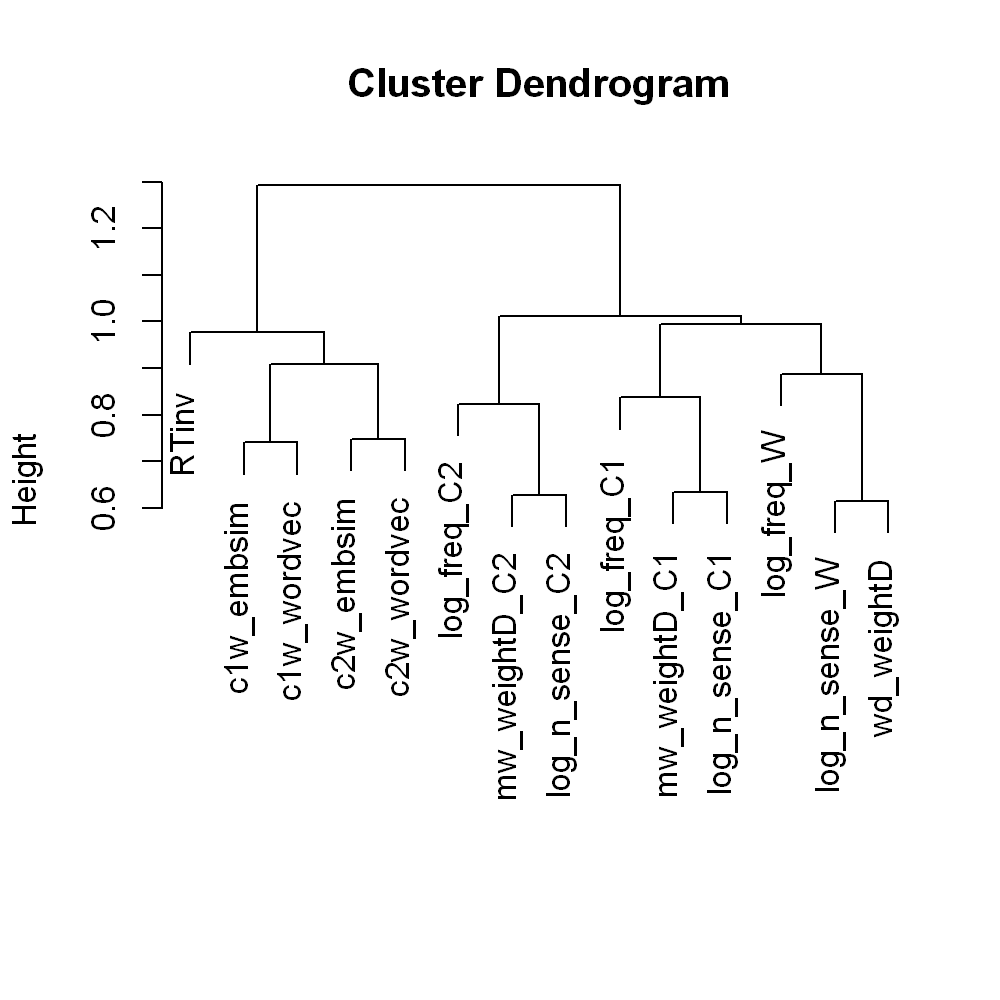

In [9]:
popt(5,5,200)
hc = hclust(as.dist(1-cor(wdata[,wdata_vars])/2))
plot(hc, sub="", xlab="")

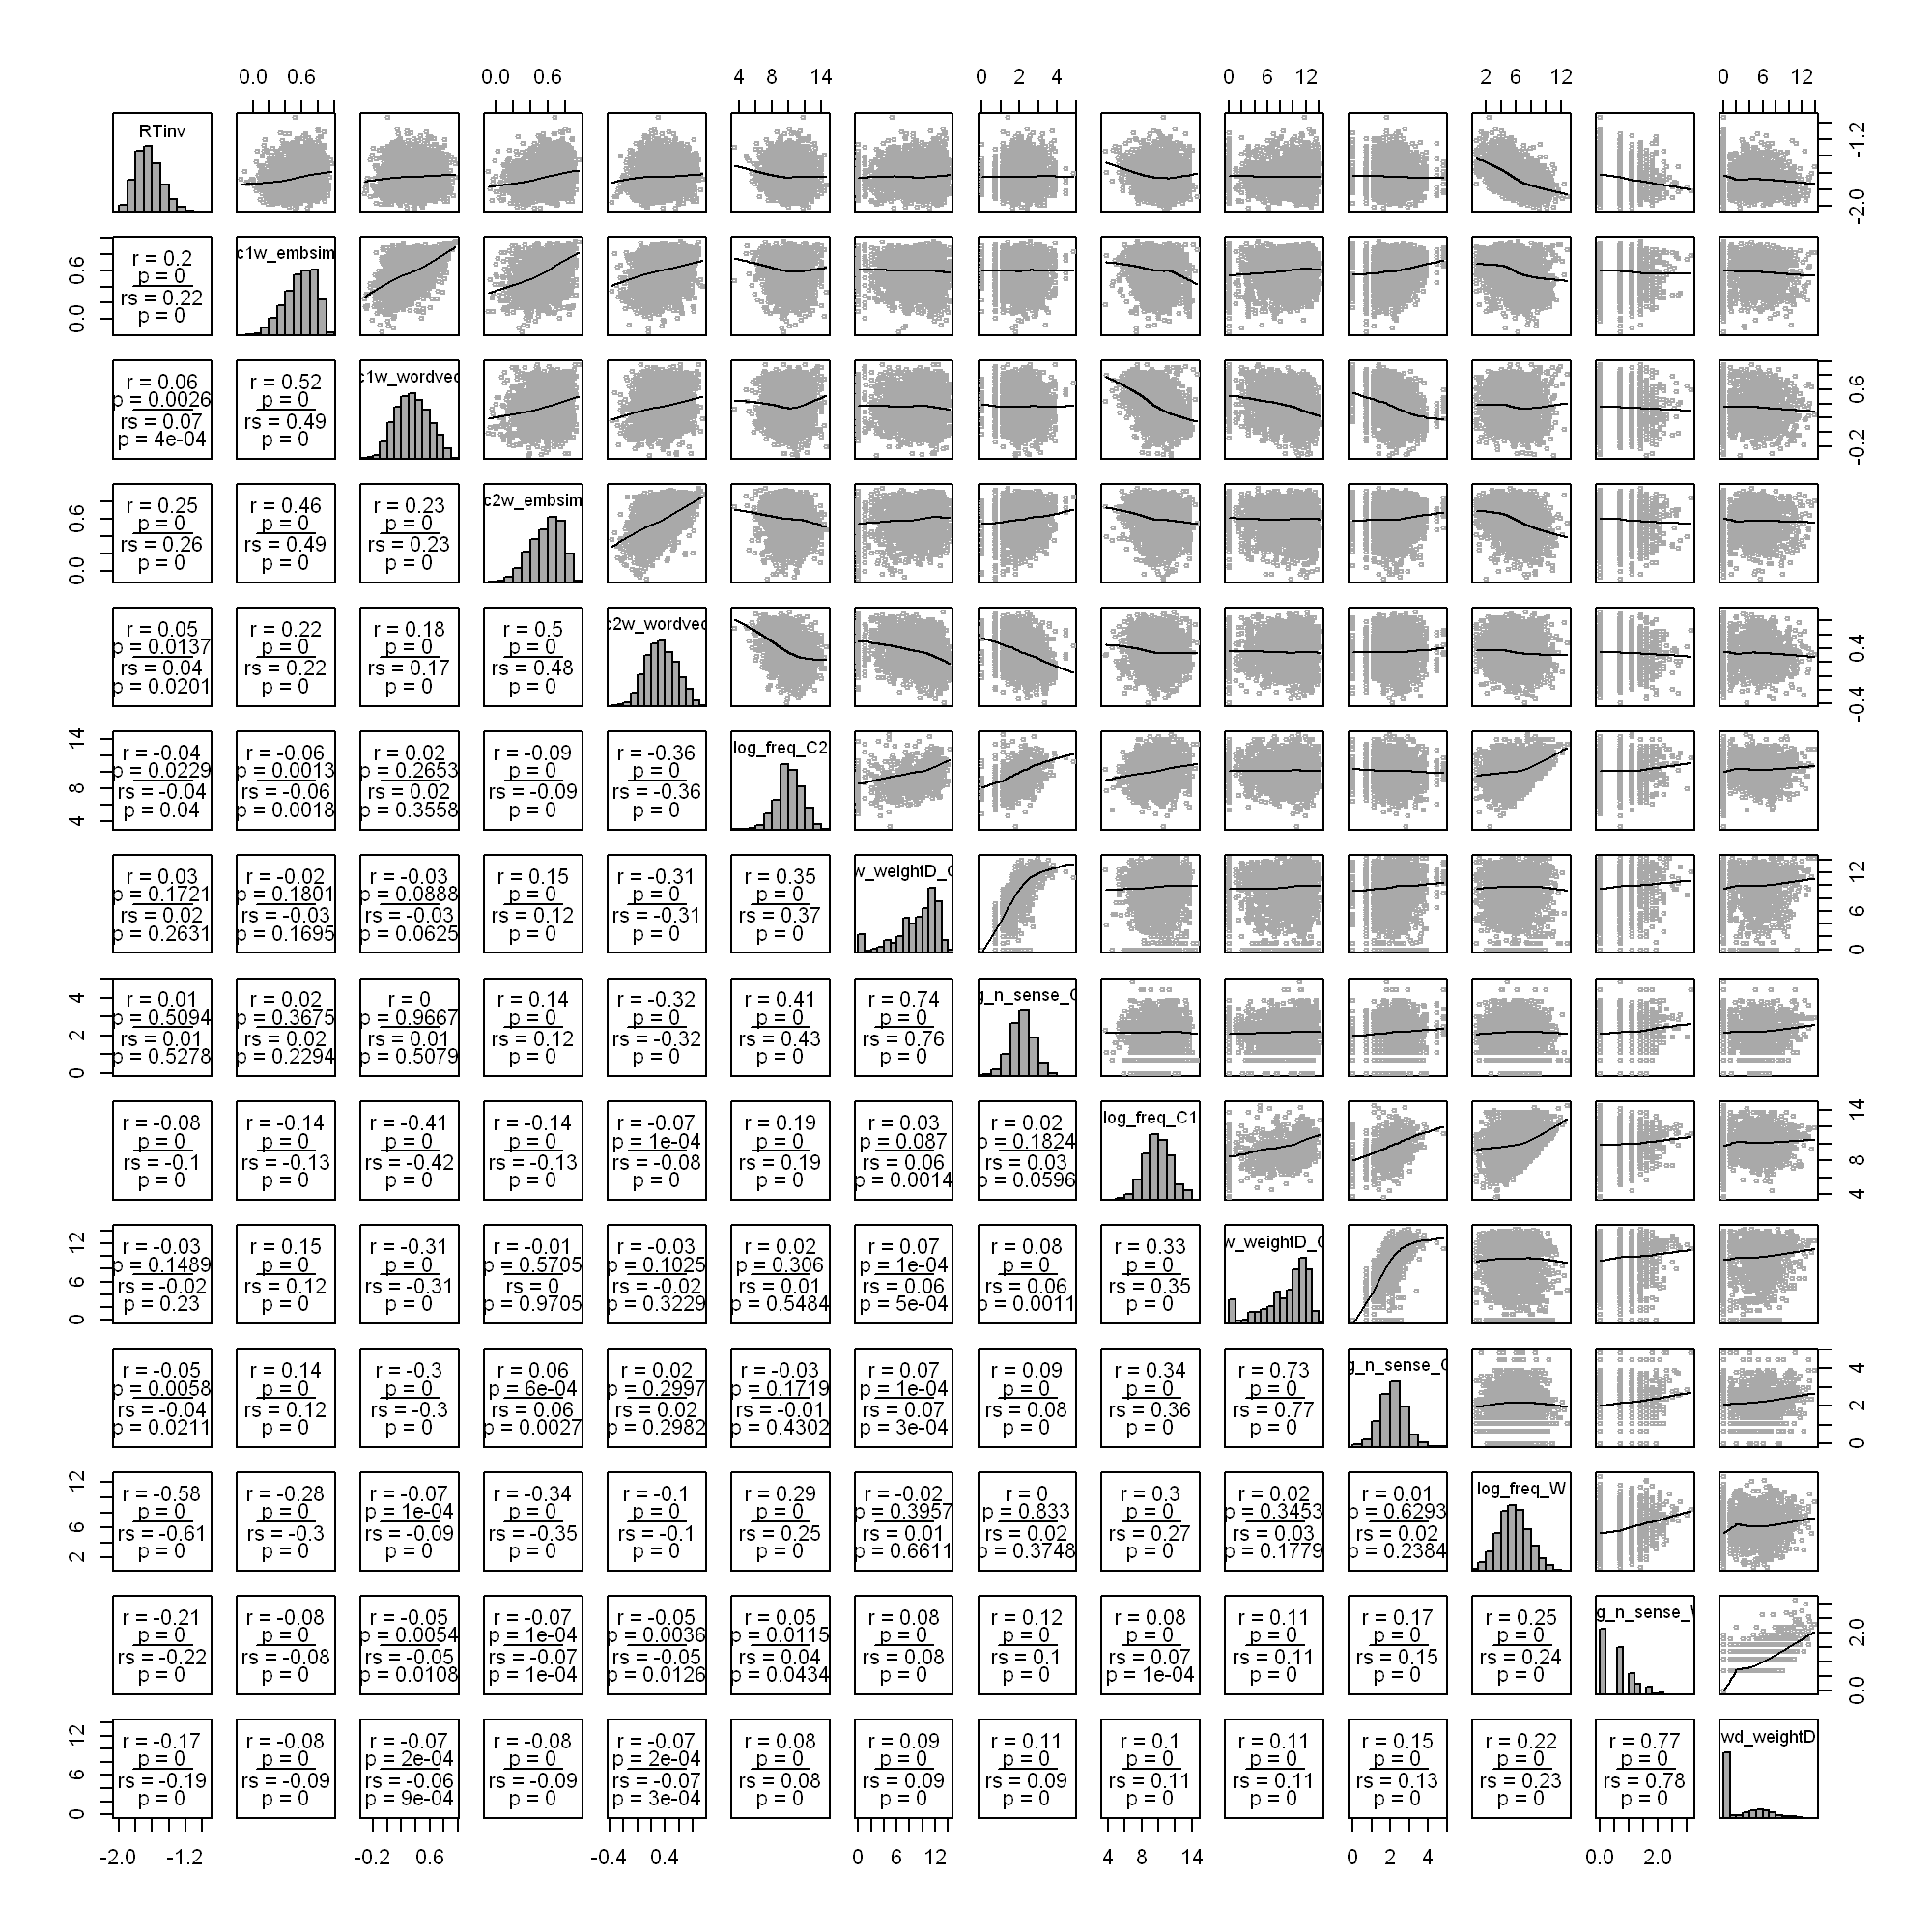

In [10]:
popt(10,10,200)
pairscor.fnc(wdata[,wdata_vars[hc$order]], cex.points=0.5)

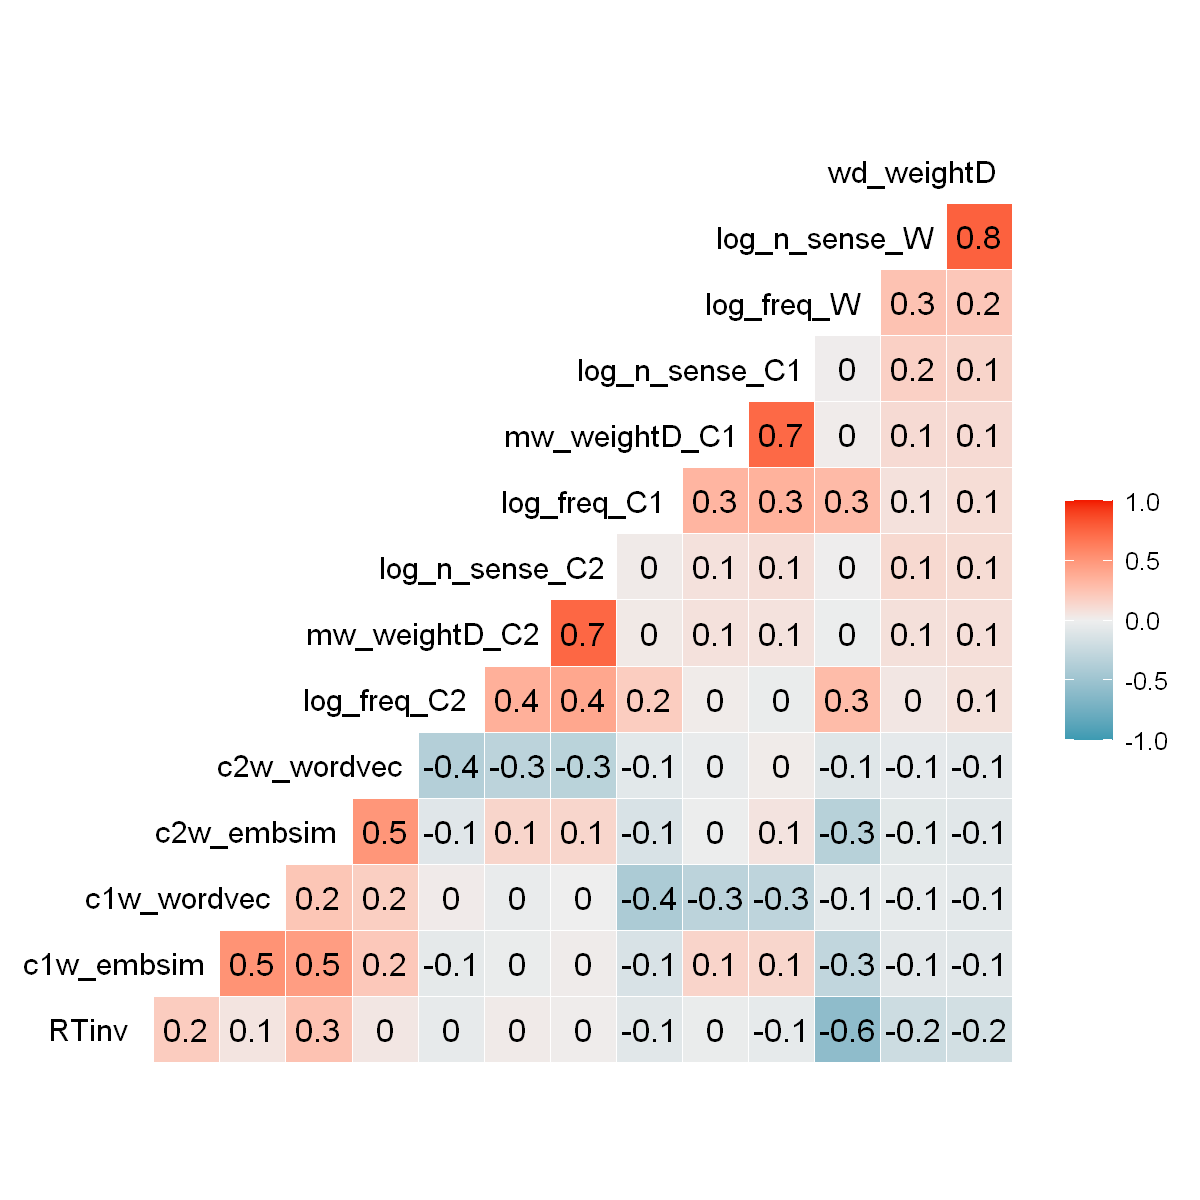

In [11]:
popt(6,6)
ggcorr(wdata[,wdata_vars[hc$order]], label=T, label_round=1, hjust=0.9, layout.exp=1)

### Word linkage length

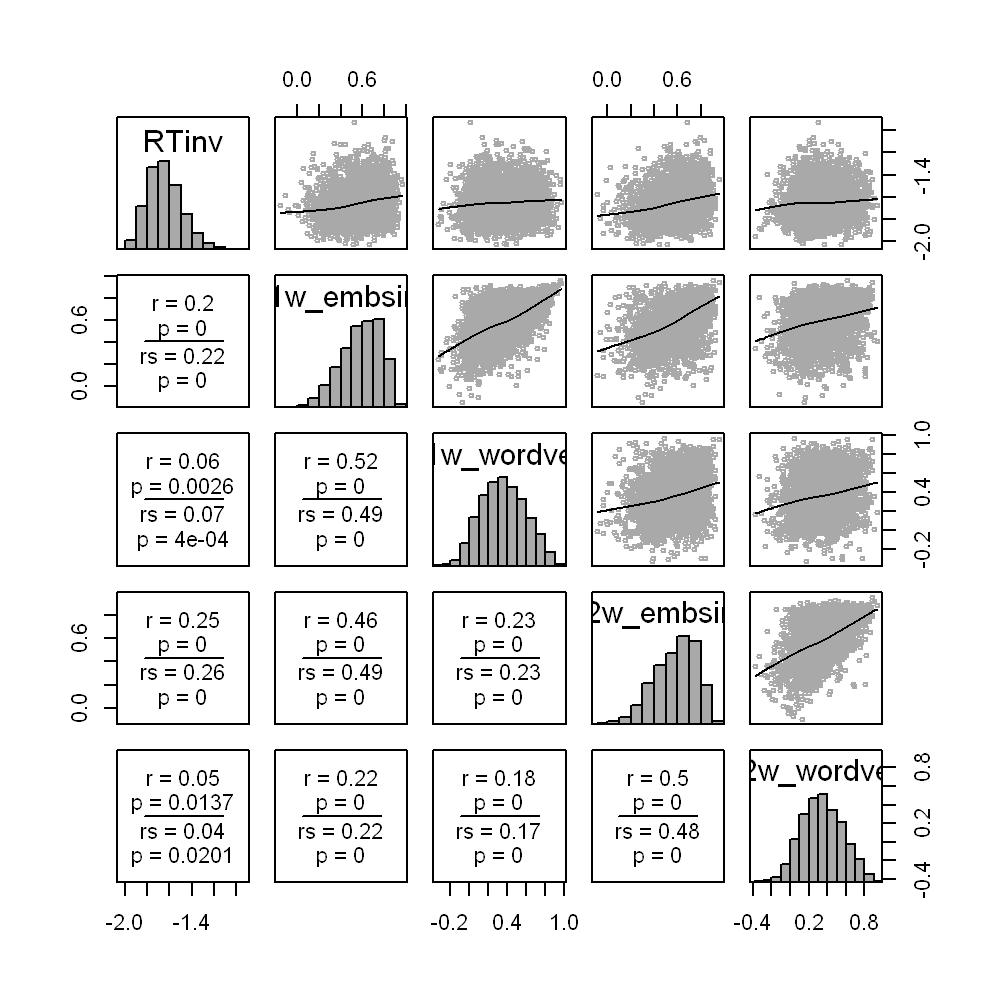

In [12]:
popt(5,5,200)
wl_vars = strsplit("RTinv,c1w_embsim,c1w_wordvec,c2w_embsim,c2w_wordvec",",")[[1]]
pairscor.fnc(wdata[,wl_vars], cex.points=0.5)

### Sense indices

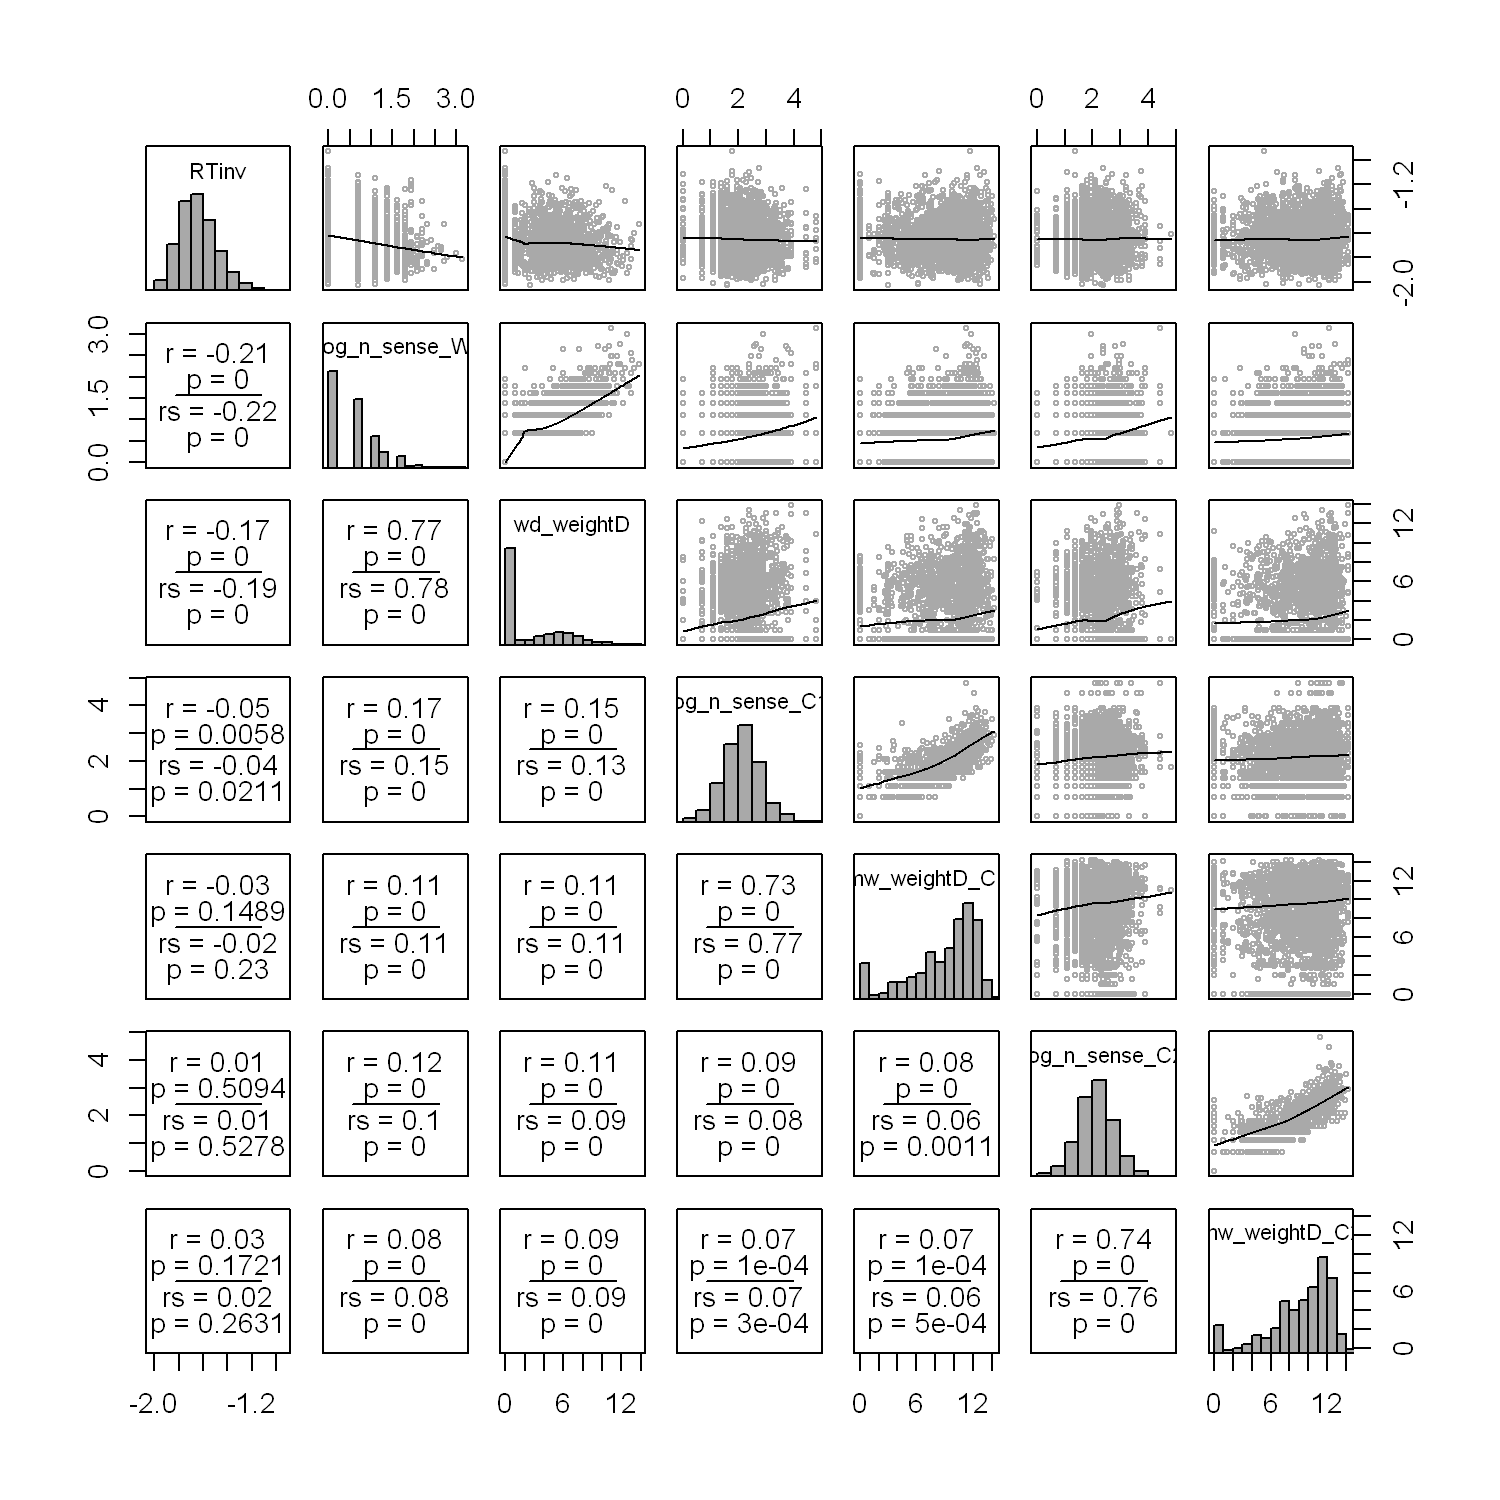

In [13]:
popt(6,6,250)
wl_vars = strsplit("RTinv,log_n_sense_W,wd_weightD,log_n_sense_C1,mw_weightD_C1,log_n_sense_C2,mw_weightD_C2",",")[[1]]
pairscor.fnc(wdata[,wl_vars], cex.points=0.5)

## Random Forest

In [14]:
require(lattice)

Loading required package: lattice



In [13]:
rf.vars.1 = strsplit(paste0("RTinv,",
        "log_freq_W,log_freq_C1,log_freq_C2,",
        "c1w_embsim,c2w_embsim,c1w_wordvec,c2w_wordvec,",
        "log_n_sense_W,log_n_sense_C1,log_n_sense_C2"),",")[[1]]
cf.1 = cforest(RTinv~., data=wdata[,rf.vars.1], ntree=100)
vi.1 = varimp(cf.1)

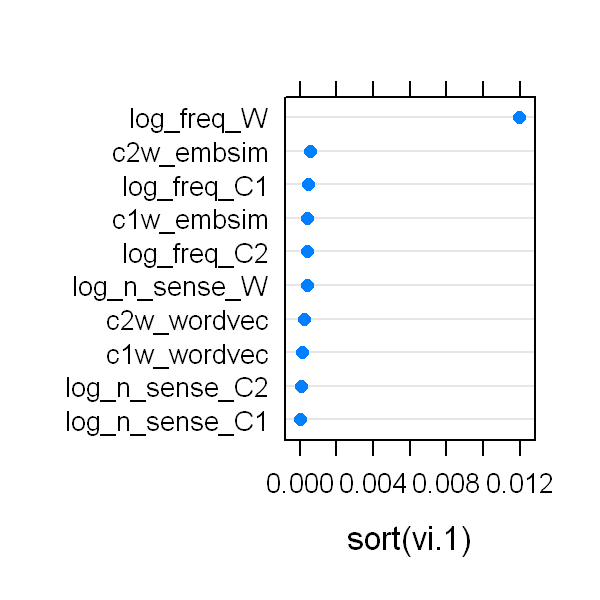

In [15]:
popt(3, 3, 200)
dotplot(sort(vi.1), main=list(cex=2))

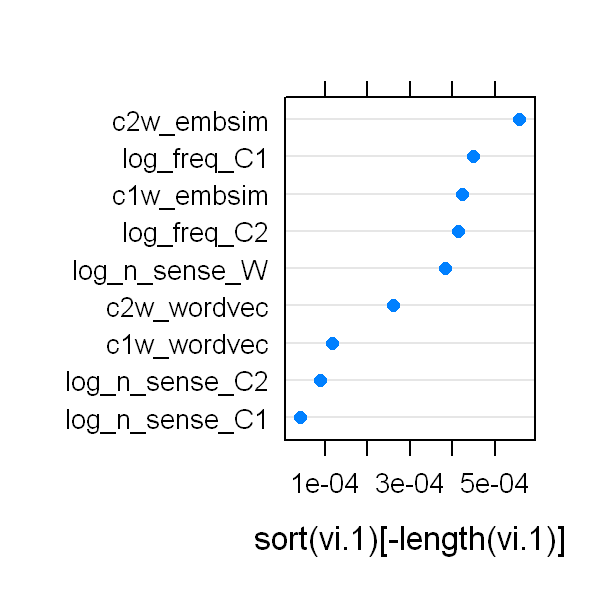

In [17]:
popt(3, 3, 200)
dotplot(sort(vi.1)[-length(vi.1)], main=list(cex=2))

In [100]:
rf.vars.2 = strsplit(paste0("RTinv,",
        "log_freq_W,log_freq_C1,log_freq_C2,",
        "c2w_embsim,c2w_wordvec,",
        "log_n_sense_W,",
        "log_n_sense_C2,mw_weightD_C2"),",")[[1]]
cf.2 = cforest(RTinv~., data=wdata[,rf.vars.2], ntree=100)
vi.2 = varimp(cf.2)

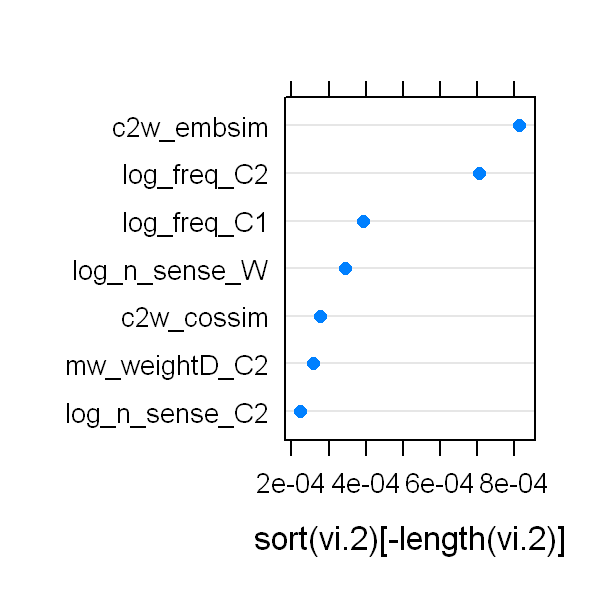

In [101]:
popt(3, 3, 200)
dotplot(sort(vi.2)[-length(vi.2)], main=list(cex=2))

## GAM - LDT

### LDT.1

In [35]:
ldt.1 = bam(RTinv~s(log_freq_W) + 
            te(log_freq_C1, log_freq_C2) + 
            s(log_n_sense_W) +
            s(c2w_embsim) + s(mw_weightD_C2)
           , data=wdata, method="ML")

In [36]:
summary(ldt.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    s(c2w_embsim) + s(mw_weightD_C2)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.643540   0.002227  -738.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                               edf Ref.df       F  p-value    
s(log_freq_W)                4.343  5.385 249.146  < 2e-16 ***
te(log_freq_C1,log_freq_C2) 10.236 12.866  12.781  < 2e-16 ***
s(log_n_sense_W)             1.000  1.000  14.627 0.000134 ***
s(c2w_embsim)                1.000  1.000  13.217 0.000282 ***
s(mw_weightD_C2)             3.874  4.771   3.334 0.006360 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.402   Deviance explained = 40.6%
-ML =  -2019  Scale est. = 0.014403  n = 2905

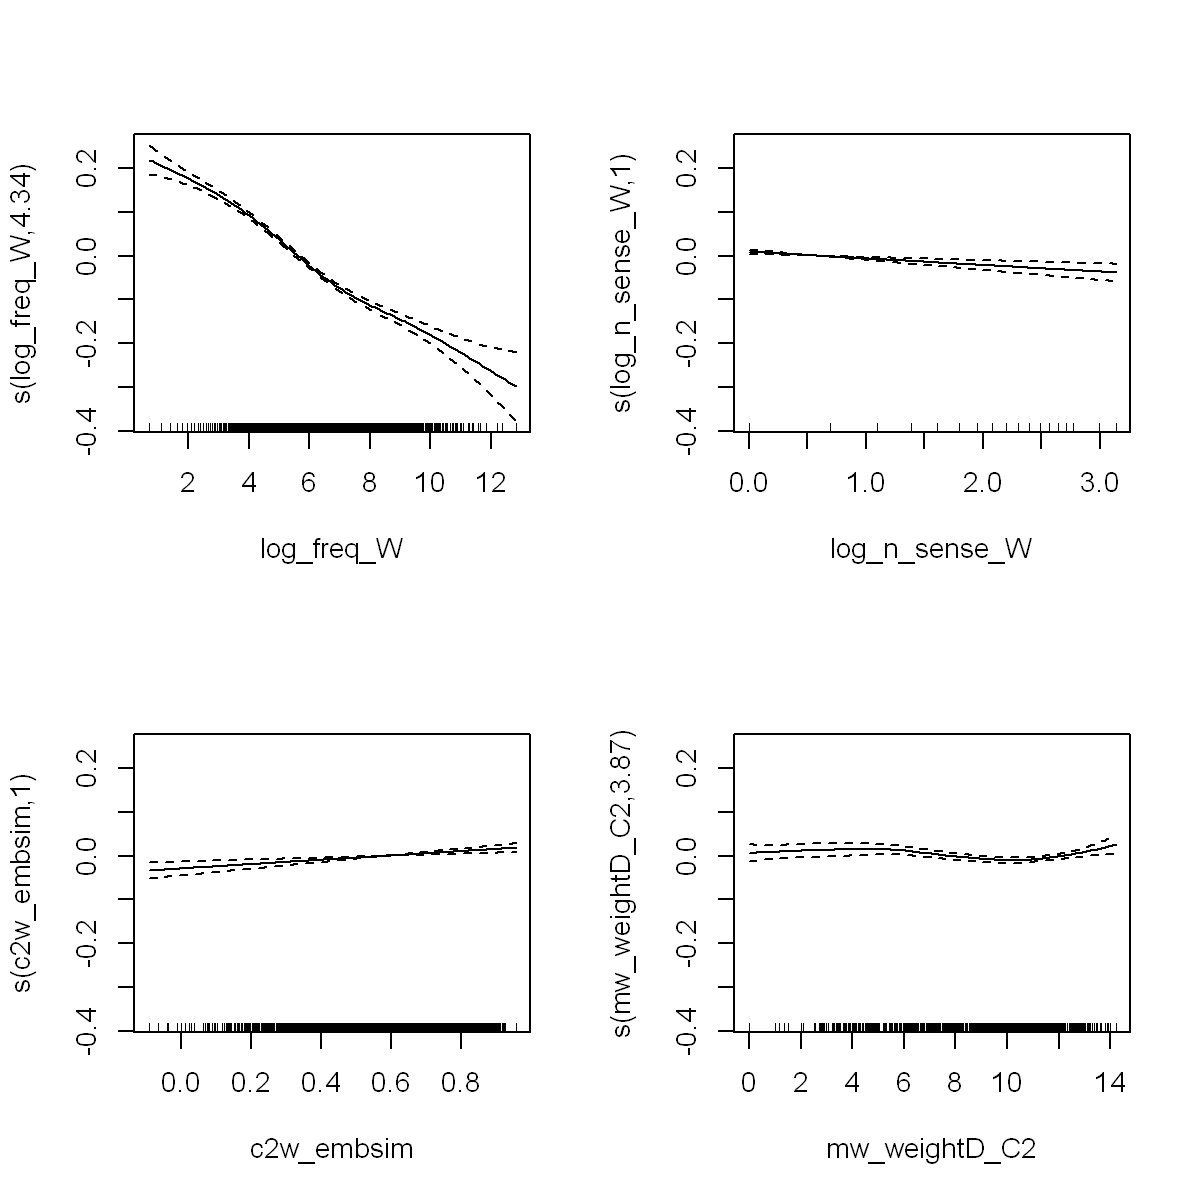

In [37]:
popt(6,6,200)
par(mfrow=c(2, 2))
for(idx in c(1, 3, 4, 5)){
    plot(ldt.1, select=idx)
}

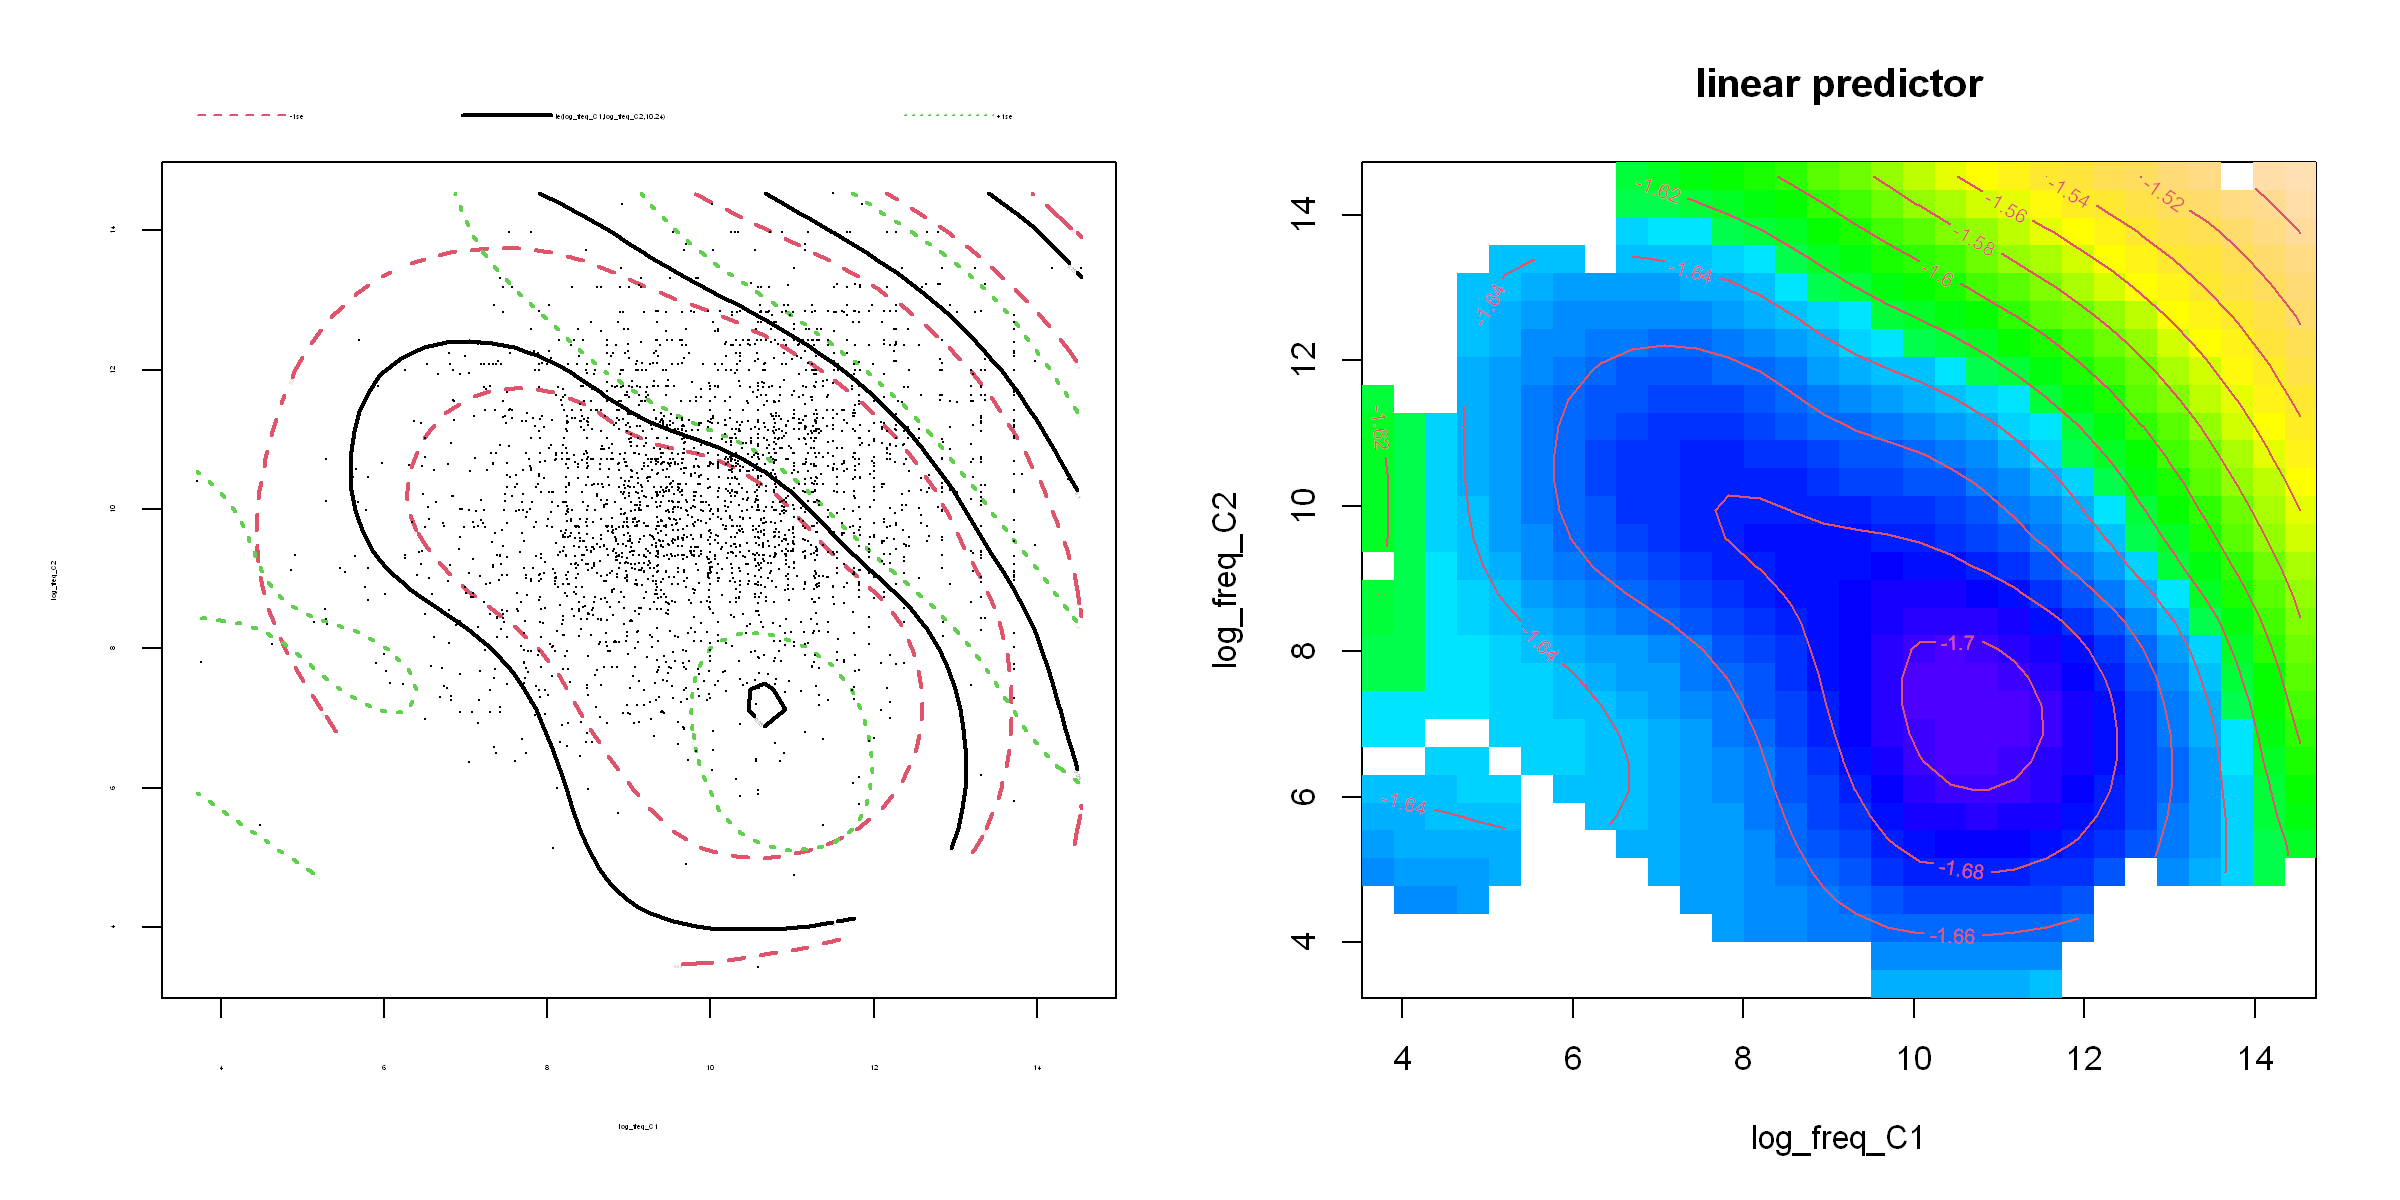

In [38]:
popt(5,5,200)
plot_int(ldt.1, 2, "log_freq_C1", "log_freq_C2")

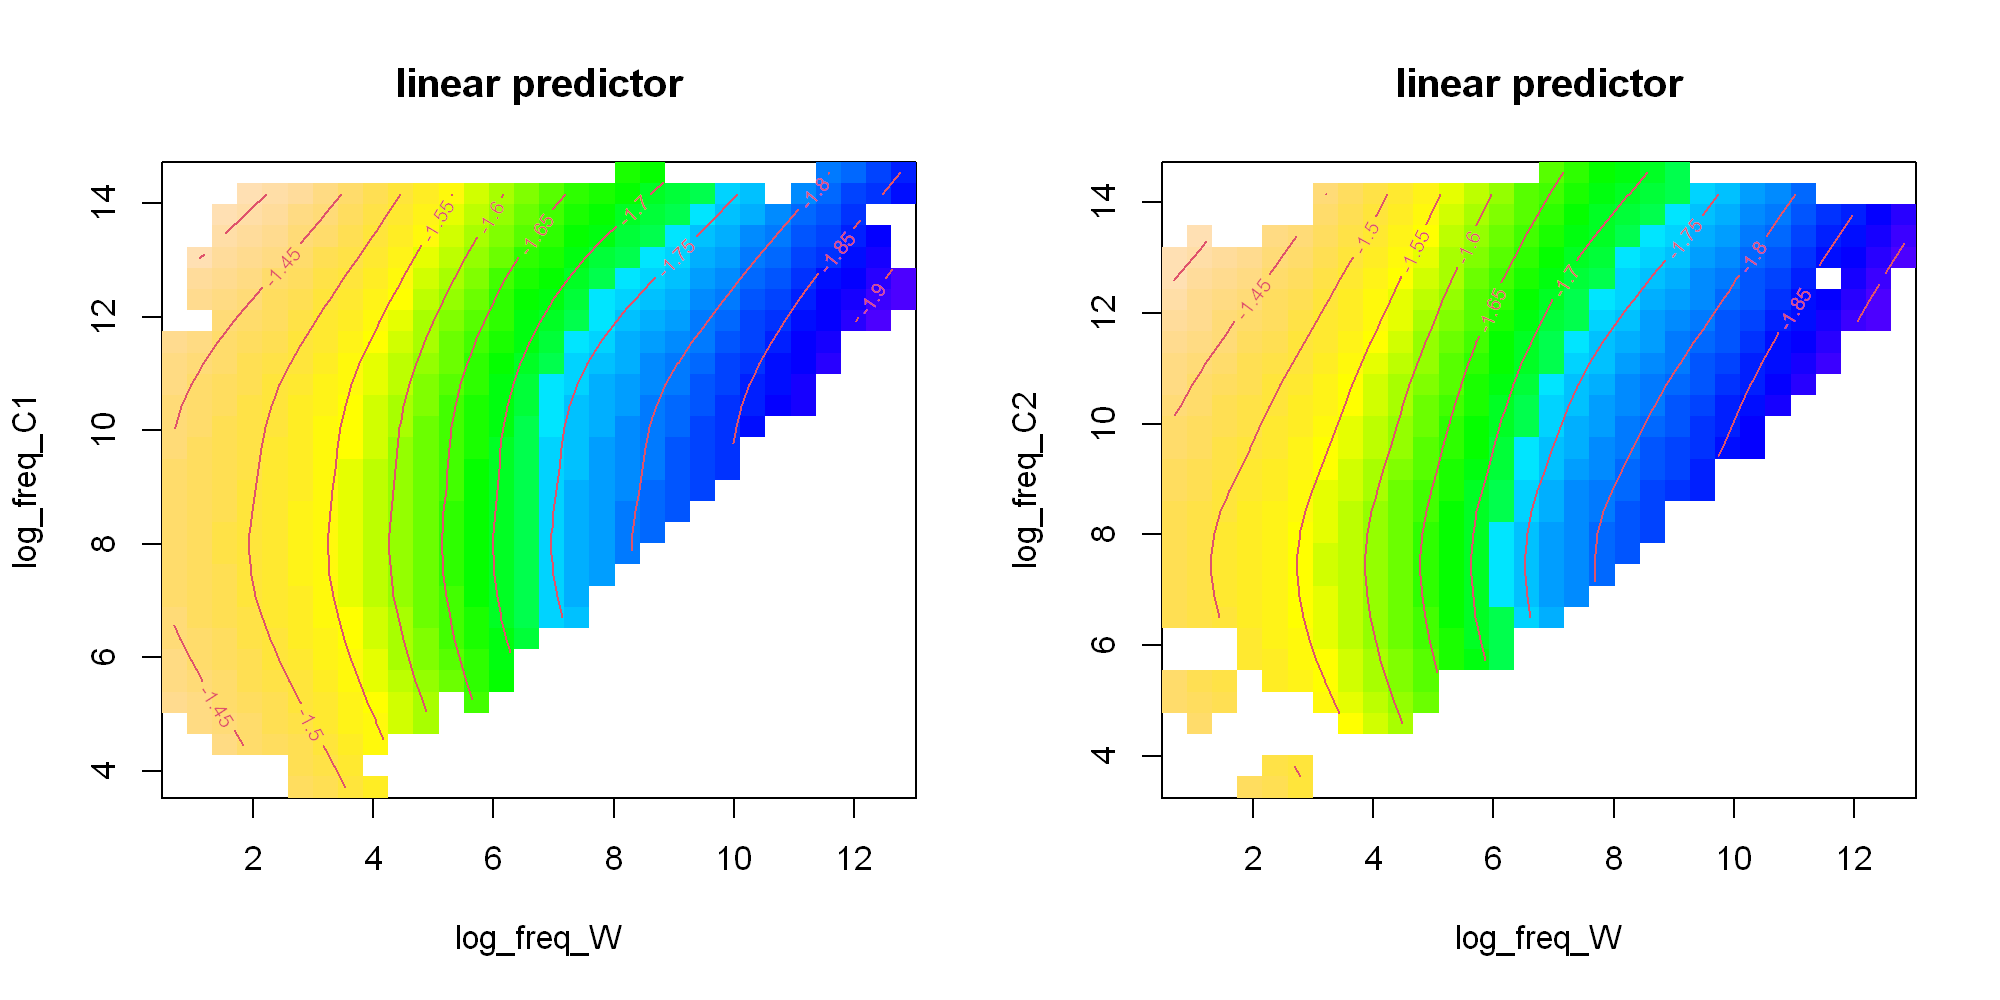

In [39]:
par(mfrow=c(1, 2))
popt(10,5,200)
vis.gam(ldt.1, view=c("log_freq_W", "log_freq_C1"), plot.type="contour", color="topo", too.far=0.05)
vis.gam(ldt.1, view=c("log_freq_W", "log_freq_C2"), plot.type="contour", color="topo", too.far=0.05)

### LDT.2

In [40]:
ldt.2 = bam(RTinv~s(log_freq_W) + 
            te(log_freq_C1, log_freq_C2) + 
            s(log_n_sense_W) +
            s(c1w_embsim) + s(c2w_embsim)+
            s(mw_weightD_C2)
           , data=wdata, method="ML")

In [41]:
summary(ldt.2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    s(c1w_embsim) + s(c2w_embsim) + s(mw_weightD_C2)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.643540   0.002227  -738.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                               edf Ref.df       F  p-value    
s(log_freq_W)                4.308  5.347 243.891  < 2e-16 ***
te(log_freq_C1,log_freq_C2) 10.269 12.900  12.784  < 2e-16 ***
s(log_n_sense_W)             1.000  1.000  14.556 0.000139 ***
s(c1w_embsim)                1.000  1.000   0.437 0.508689    
s(c2w_embsim)                1.000  1.000   9.309 0.002300 ** 
s(mw_weightD_C2)             3.888  4.787   3.332 0.006302 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.402   Deviance explained = 40.6%
-ML = -2019.2  S

In [42]:
compareML(ldt.1, ldt.2)

ldt.1: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    s(c2w_embsim) + s(mw_weightD_C2)

ldt.2: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    s(c1w_embsim) + s(c2w_embsim) + s(mw_weightD_C2)


Warning message in sprintf("   ", h1):
"one argument not used by format '   '"



Chi-square test of ML scores
-----
  Model     Score Edf Difference    Df p.value Sig.
1 ldt.1 -2018.994  14                              
2 ldt.2 -2019.211  16      0.216 2.000   0.805     

AIC difference: -1.56, model ldt.1 has lower AIC.



Warning message in compareML(ldt.1, ldt.2):
"Only small difference in ML...
"


### LDT.3

In [43]:
ldt.3 = bam(RTinv~s(log_freq_W) + 
            te(log_freq_C1, log_freq_C2) + 
            s(log_n_sense_W) +
            te(c1w_embsim, c2w_embsim)+
            s(mw_weightD_C2)
           , data=wdata, method="ML")

In [44]:
summary(ldt.3)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    te(c1w_embsim, c2w_embsim) + s(mw_weightD_C2)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.643540   0.002215    -742   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                               edf Ref.df       F  p-value    
s(log_freq_W)                4.321  5.360 244.665  < 2e-16 ***
te(log_freq_C1,log_freq_C2) 10.168 12.792  11.943  < 2e-16 ***
s(log_n_sense_W)             1.000  1.001  13.673 0.000222 ***
te(c1w_embsim,c2w_embsim)    7.385  9.502   4.521 5.68e-06 ***
s(mw_weightD_C2)             3.841  4.732   2.990 0.012484 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.408   Deviance explained = 41.3%
-ML = -2029.2  Scale est. = 0.014254  n = 2905

In [45]:
compareML(ldt.1, ldt.3)

ldt.1: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    s(c2w_embsim) + s(mw_weightD_C2)

ldt.3: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    te(c1w_embsim, c2w_embsim) + s(mw_weightD_C2)


Warning message in sprintf("***", h1):
"one argument not used by format '***'"



Chi-square test of ML scores
-----
  Model     Score Edf Difference    Df   p.value Sig.
1 ldt.1 -2018.994  14                                
2 ldt.3 -2029.158  17     10.164 3.000 1.451e-04  ***

AIC difference: 15.86, model ldt.3 has lower AIC.



In [46]:
compareML(ldt.2, ldt.3)

ldt.2: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    s(c1w_embsim) + s(c2w_embsim) + s(mw_weightD_C2)

ldt.3: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    te(c1w_embsim, c2w_embsim) + s(mw_weightD_C2)


Warning message in sprintf("***", h1):
"one argument not used by format '***'"



Chi-square test of ML scores
-----
  Model     Score Edf Difference    Df   p.value Sig.
1 ldt.2 -2019.211  16                                
2 ldt.3 -2029.158  17      9.948 1.000 8.178e-06  ***

AIC difference: 17.42, model ldt.3 has lower AIC.



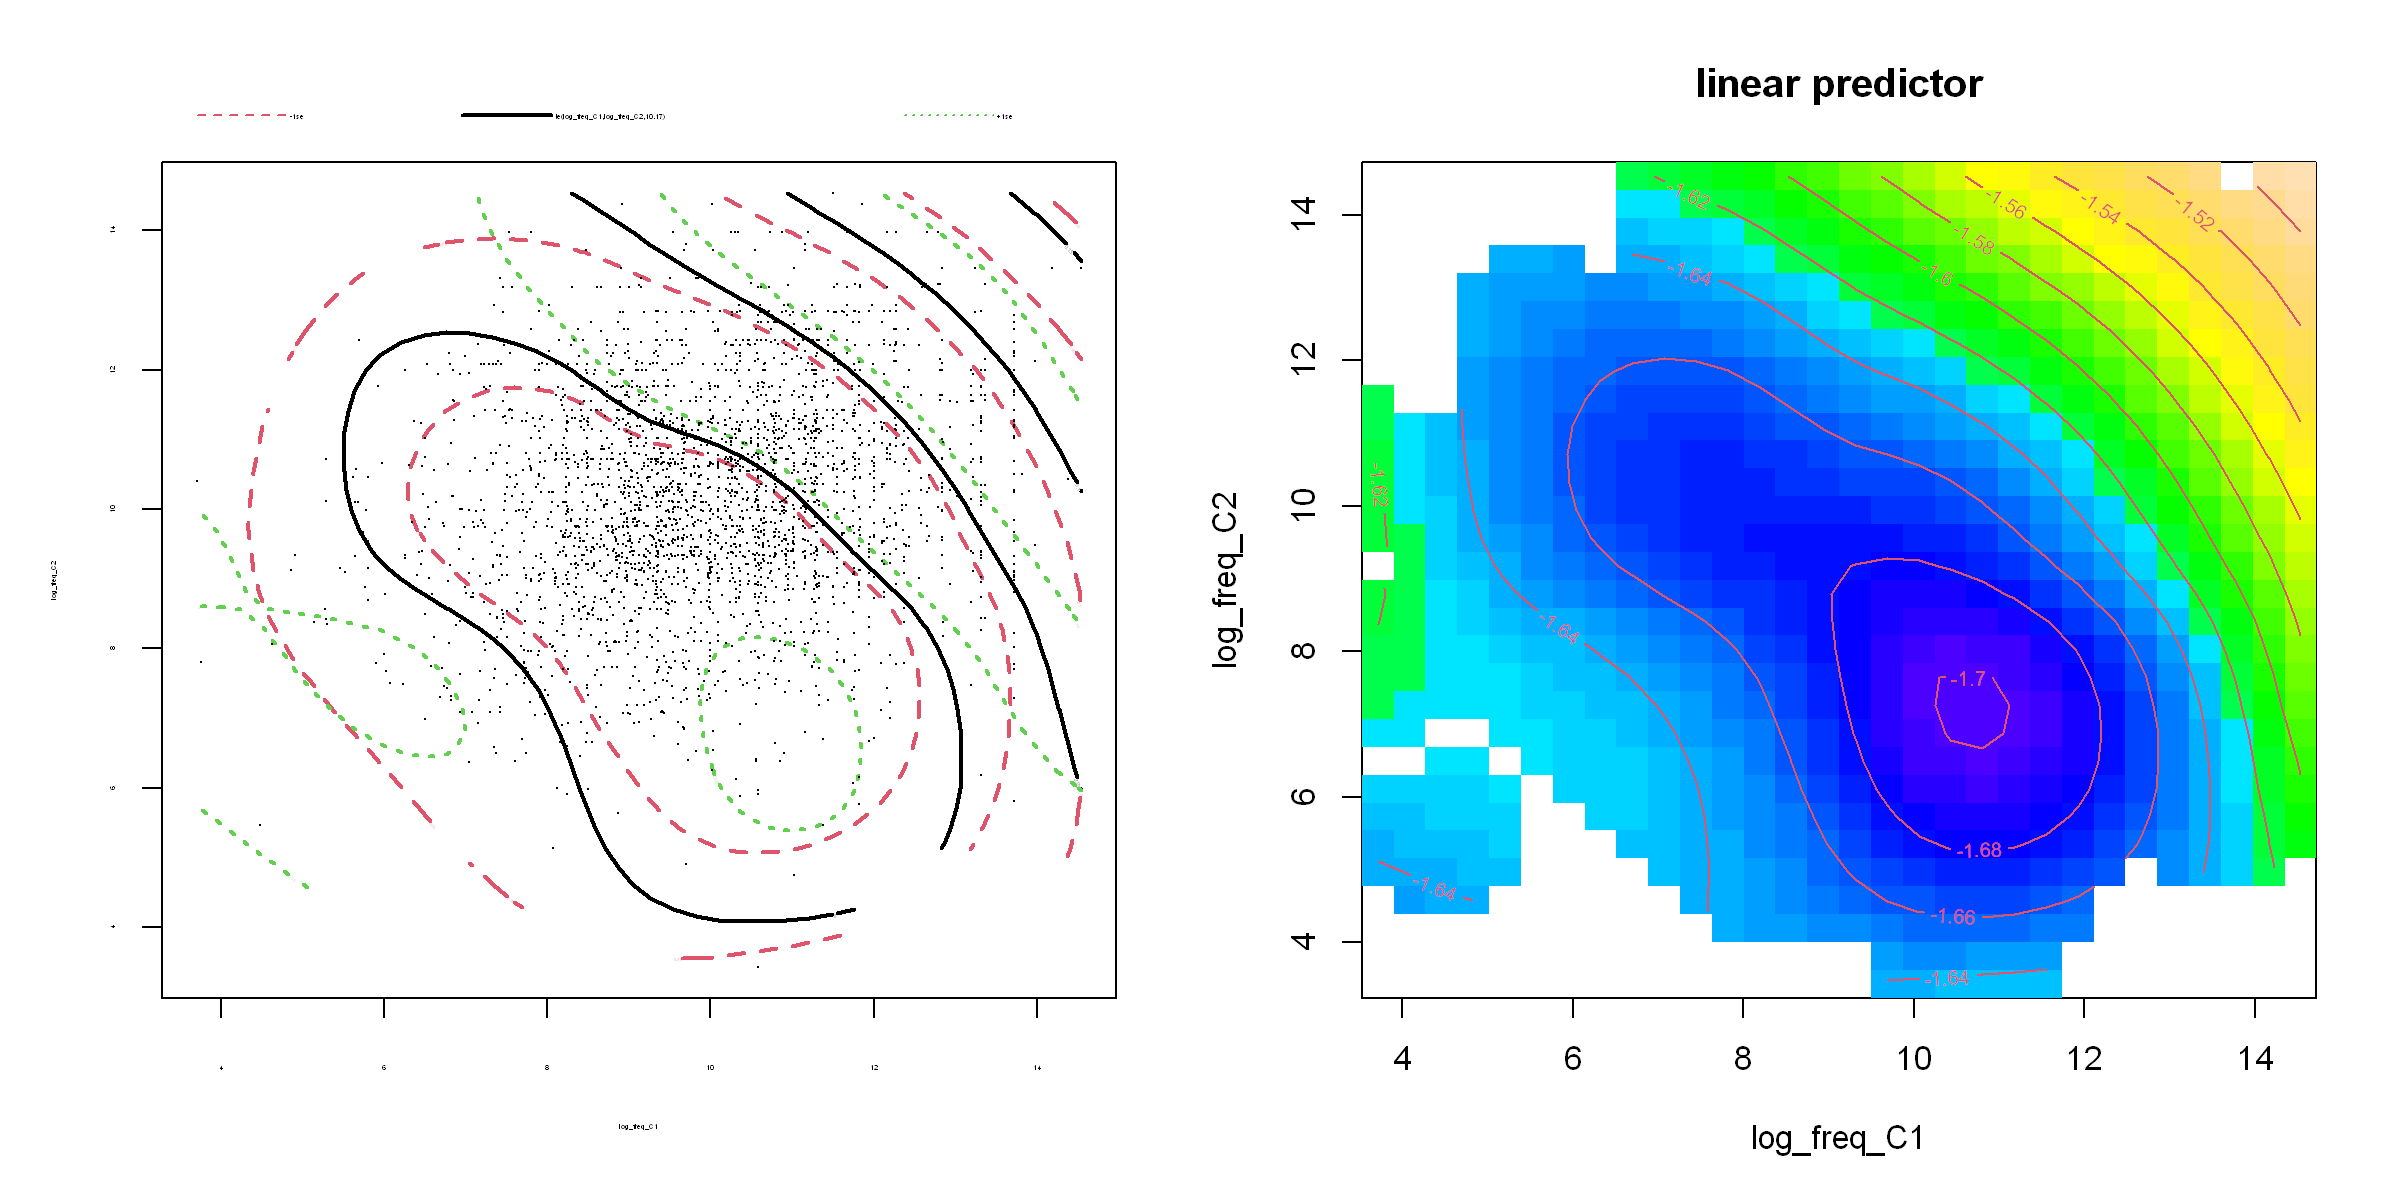

In [47]:
popt(5,5,200)
plot_int(ldt.3, 2, "log_freq_C1", "log_freq_C2")

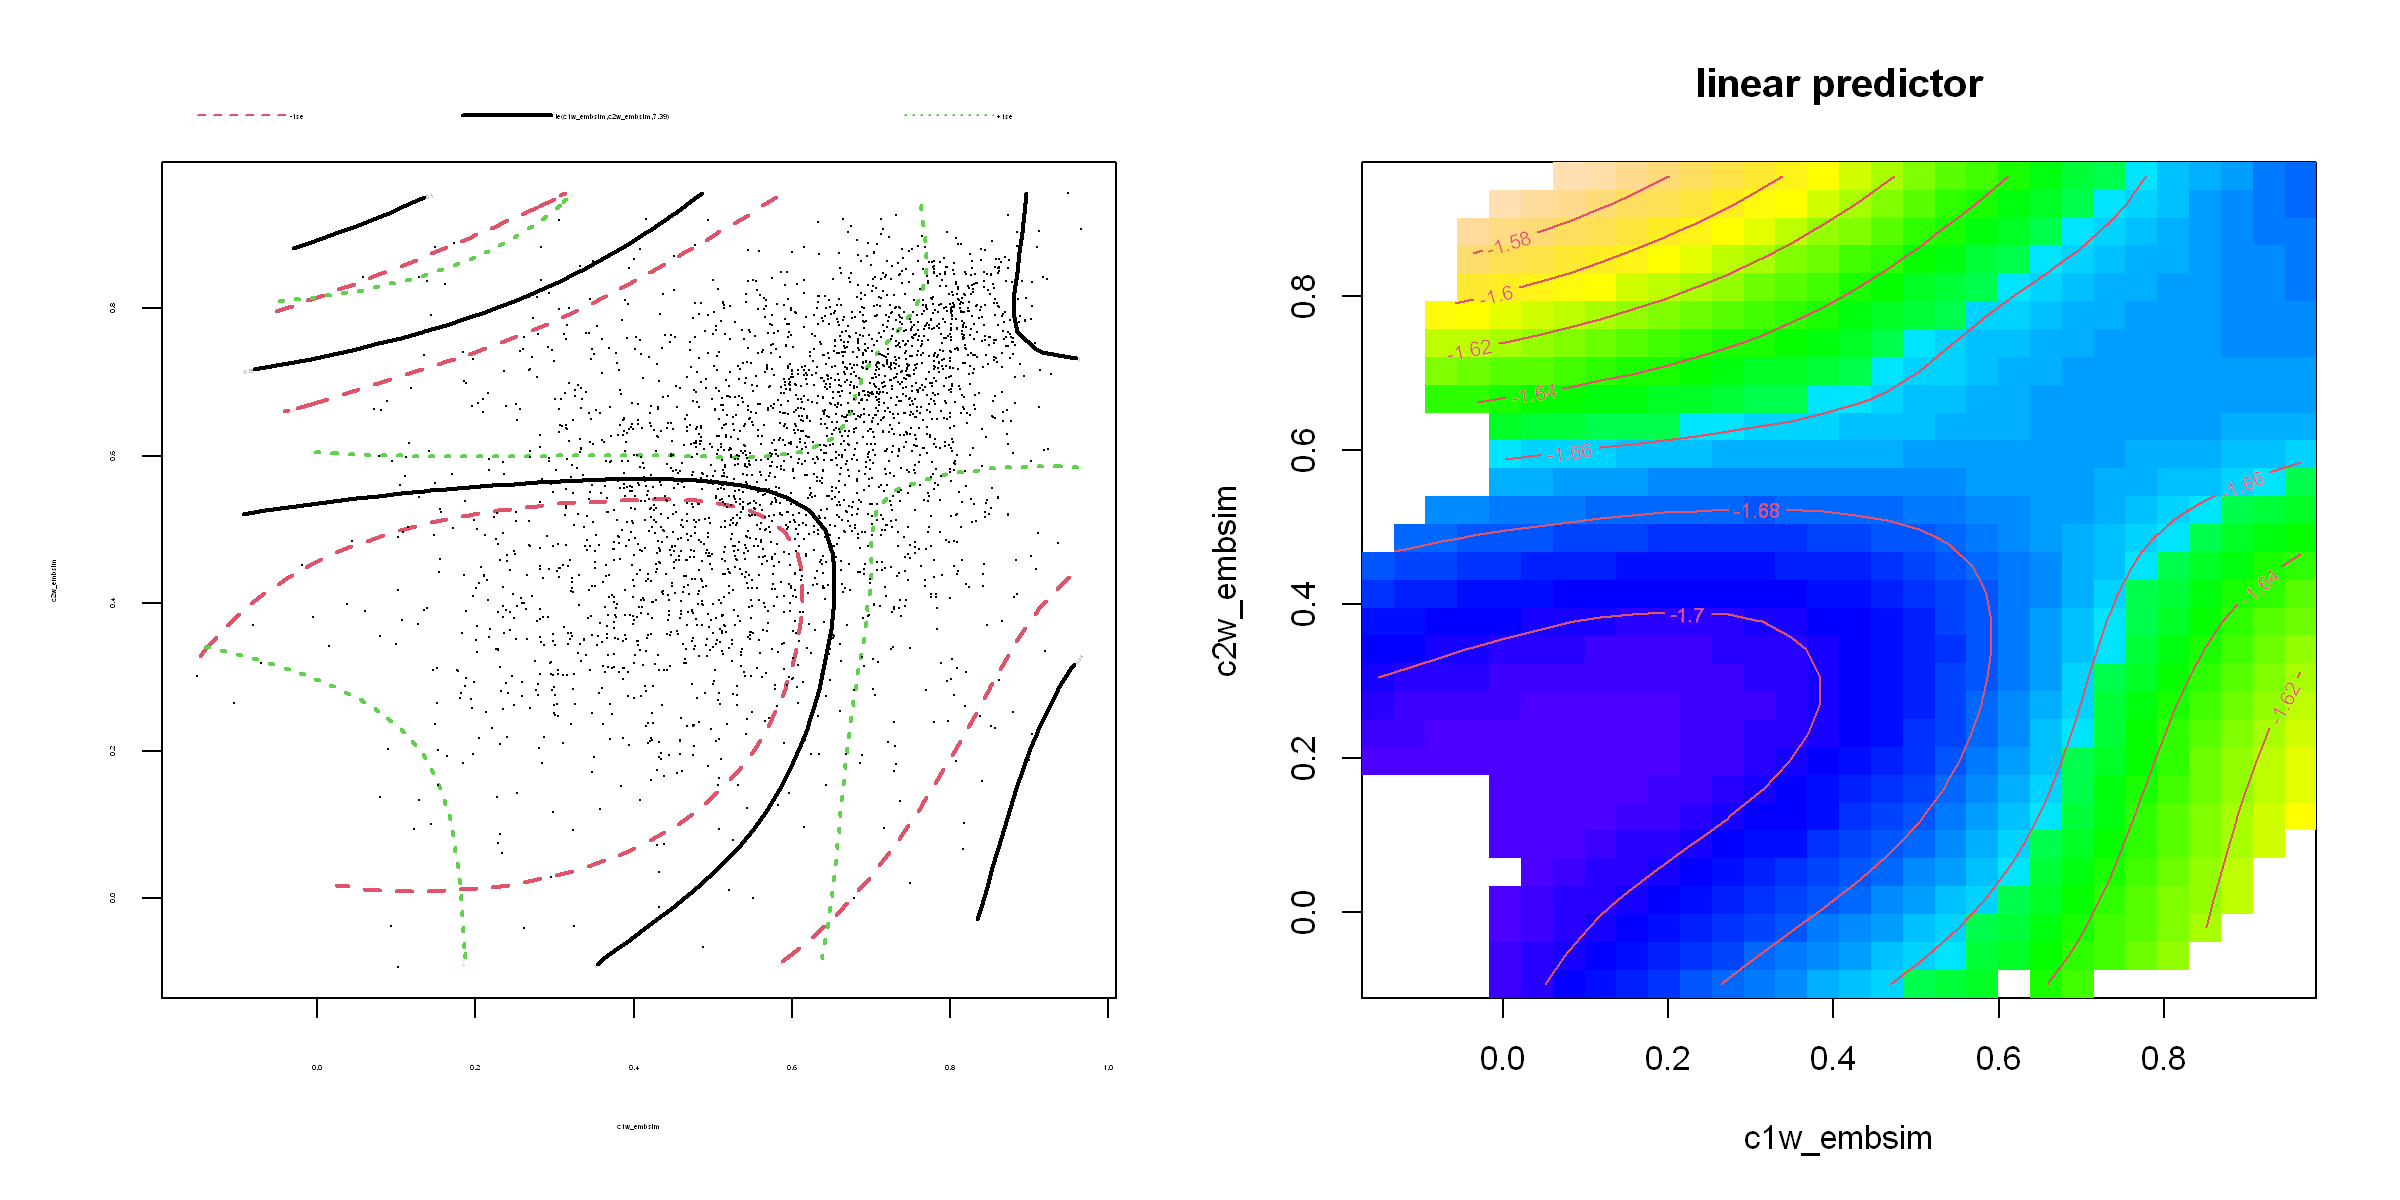

In [48]:
popt(5,5,200)
plot_int(ldt.3, 4, "c1w_embsim", "c2w_embsim")

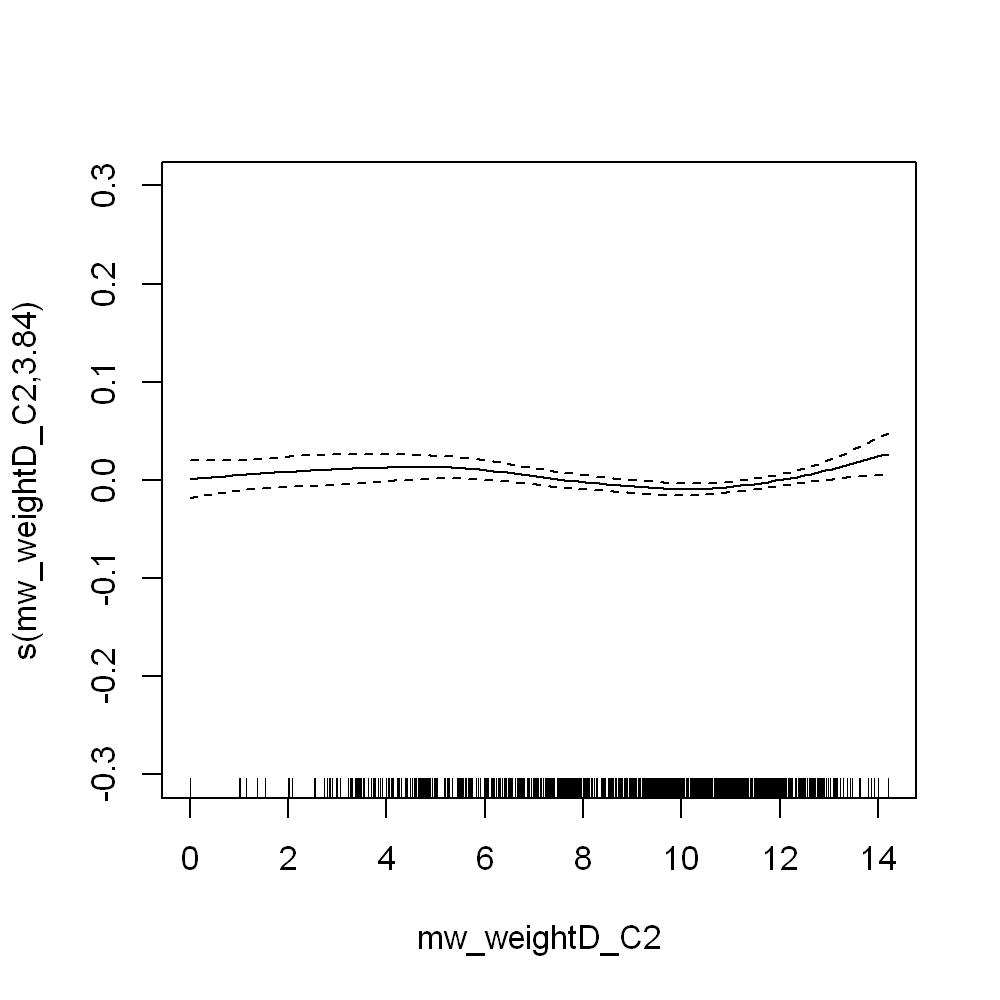

In [49]:
popt(5, 5)
plot(ldt.3, select=5, ylim=c(-0.3,0.3))


Method: ML   Optimizer: outer newton
full convergence after 12 iterations.
Gradient range [-0.0006082716,0.0001345706]
(score -2029.158 & scale 0.01425429).
Hessian positive definite, eigenvalue range [0.0006075092,1452.514].
Model rank =  76 / 76 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                               k'   edf k-index p-value    
s(log_freq_W)                9.00  4.32    1.01    0.68    
te(log_freq_C1,log_freq_C2) 24.00 10.17    0.98    0.16    
s(log_n_sense_W)             9.00  1.00    0.98    0.09 .  
te(c1w_embsim,c2w_embsim)   24.00  7.39    1.01    0.70    
s(mw_weightD_C2)             9.00  3.84    0.92  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


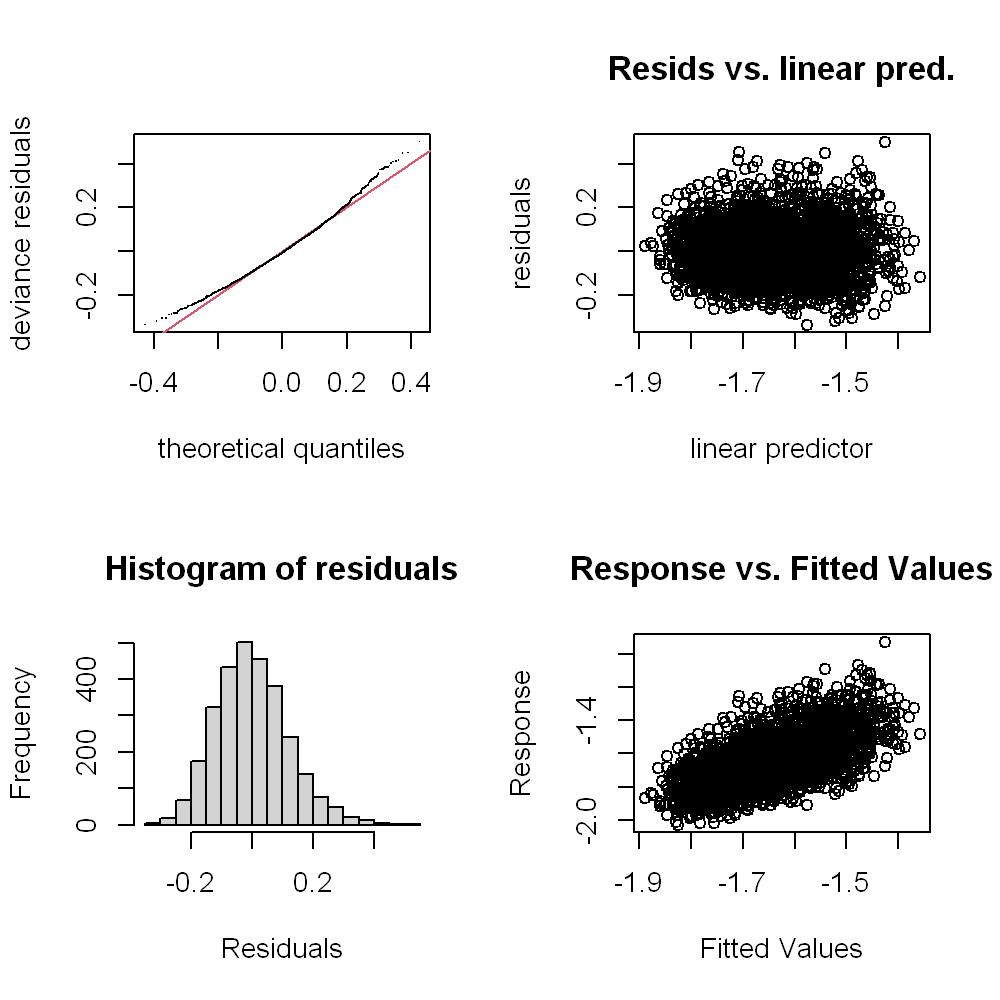

In [50]:
popt(5, 5)
gam.check(ldt.3)

In [55]:
concurvity(ldt.3)

,para,s(log_freq_W),"te(log_freq_C1,log_freq_C2)",s(log_n_sense_W),"te(c1w_embsim,c2w_embsim)",s(mw_weightD_C2)
worst,5.157437e-22,0.4027764,0.3752292,0.10383651,0.21783982,0.27859556
observed,5.157437e-22,0.3284822,0.2525879,0.10177124,0.06790505,0.06863307
estimate,5.157437e-22,0.2250015,0.1221415,0.08843696,0.06601566,0.19812026


### LDT.4 compare sense embedding and word embedding

In [51]:
ldt.4 = bam(RTinv~s(log_freq_W) + 
            te(log_freq_C1, log_freq_C2) + 
            s(log_n_sense_W) +
            te(c1w_wordvec, c2w_wordvec)+
            s(mw_weightD_C2)
           , data=wdata, method="ML")

In [52]:
summary(ldt.4)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    te(c1w_wordvec, c2w_wordvec) + s(mw_weightD_C2)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.64354    0.00223    -737   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                               edf Ref.df       F  p-value    
s(log_freq_W)                4.338  5.379 288.132  < 2e-16 ***
te(log_freq_C1,log_freq_C2) 10.191 12.822  12.900  < 2e-16 ***
s(log_n_sense_W)             1.000  1.000  13.893 0.000197 ***
te(c1w_wordvec,c2w_wordvec)  3.001  3.002   2.159 0.090683 .  
s(mw_weightD_C2)             3.870  4.767   3.230 0.007743 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =    0.4   Deviance explained = 40.5%
-ML = -2015.6  Scale est. = 0.014447  n = 2905

In [53]:
compareML(ldt.3, ldt.4)

ldt.3: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    te(c1w_embsim, c2w_embsim) + s(mw_weightD_C2)

ldt.4: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(log_n_sense_W) + 
    te(c1w_wordvec, c2w_wordvec) + s(mw_weightD_C2)

Model ldt.3 preferred: lower ML score (13.525), and equal df (0.000).
-----
  Model     Score Edf Difference    Df
1 ldt.4 -2015.634  17                 
2 ldt.3 -2029.158  17     13.525 0.000

AIC difference: -26.64, model ldt.3 has lower AIC.



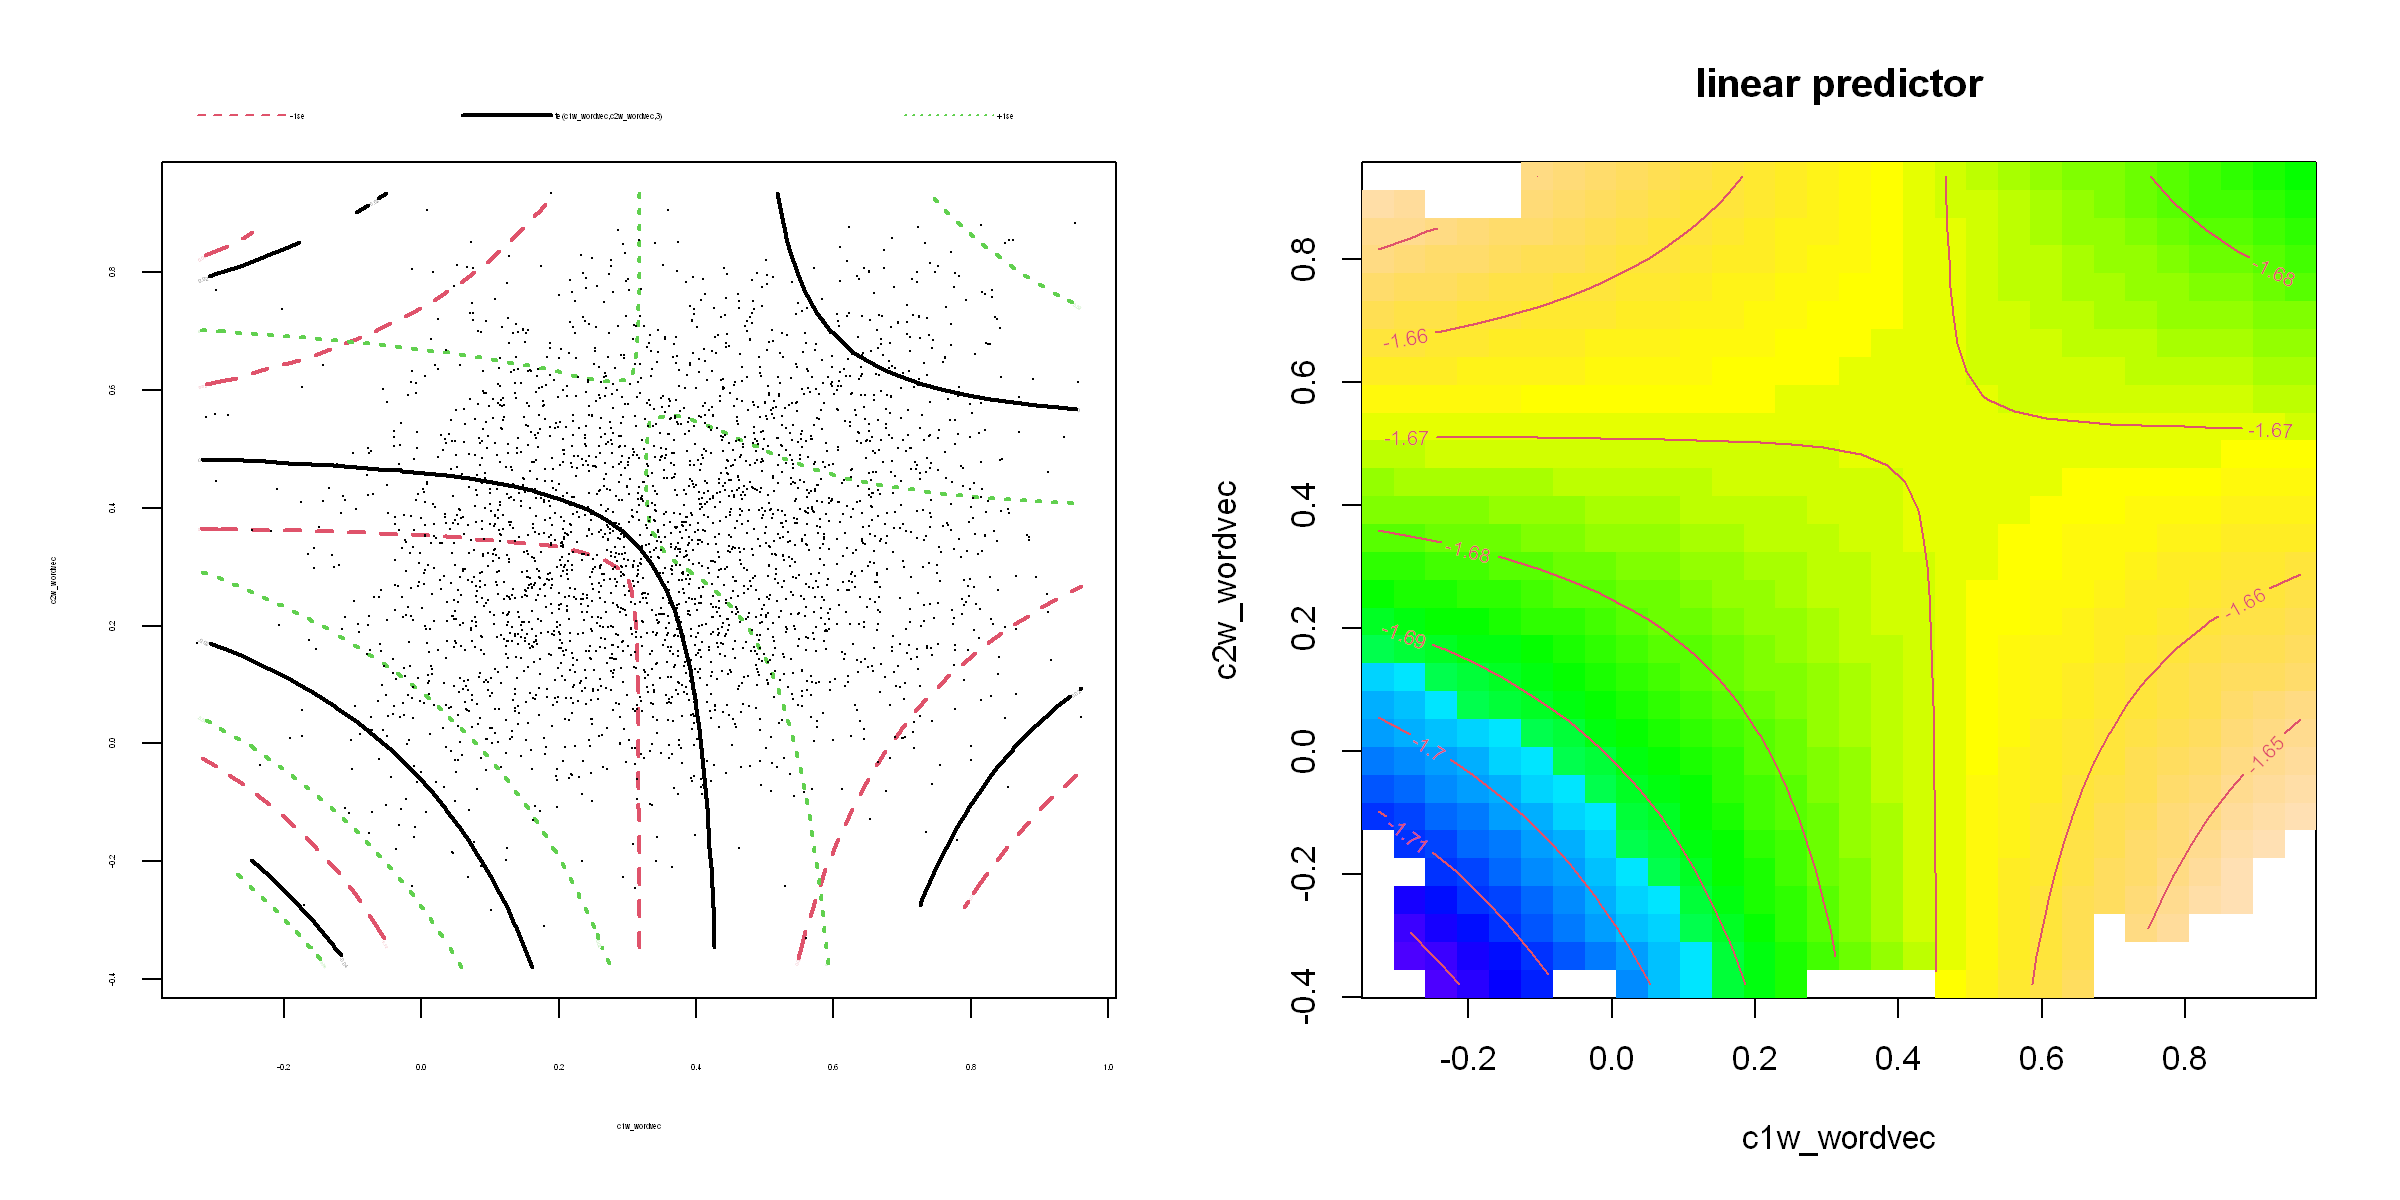

In [54]:
popt(10, 5)
plot_int(ldt.4, 4, "c1w_wordvec", "c2w_wordvec")